In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv ('temperature_forecast.csv',parse_dates=["Date"])
df.head(5)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
pd.set_option('display.max_columns', None)
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaT,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [4]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [5]:
column = ['station','date','present_tmax','present_tmin','ldaps_rh_min','ldaps_rh_max','ldaps_tmax_lapse','ldaps_tmin_lapse',
         'ldaps_ws','ldaps_lh','ldaps_cc1','ldaps_cc2','ldaps_cc3','ldaps_cc4','ldaps_ppt1','ldaps_ppt2','ldaps_ppt3',
          'ldaps_ppt4','lat','lon','dem','slope','solar_radiation','next_tmax','next_tmin']

# here we are making column name in single 'small latter formate'

In [6]:
df.columns = column

# here we are assigning ,small latter new comlumn names insted to earlier names.

In [7]:
df.columns
# here we can see the changes properly

Index(['station', 'date', 'present_tmax', 'present_tmin', 'ldaps_rh_min',
       'ldaps_rh_max', 'ldaps_tmax_lapse', 'ldaps_tmin_lapse', 'ldaps_ws',
       'ldaps_lh', 'ldaps_cc1', 'ldaps_cc2', 'ldaps_cc3', 'ldaps_cc4',
       'ldaps_ppt1', 'ldaps_ppt2', 'ldaps_ppt3', 'ldaps_ppt4', 'lat', 'lon',
       'dem', 'slope', 'solar_radiation', 'next_tmax', 'next_tmin'],
      dtype='object')

In [8]:
df.columns.nunique()
# there are 25 unique columns are present in our dataset.

25

In [9]:
df.dtypes
# here in the following table we can see that only date column is in 'object' datatype. (which is incorrect)
# rest of all columns are in 'float' data type.

station                    float64
date                datetime64[ns]
present_tmax               float64
present_tmin               float64
ldaps_rh_min               float64
ldaps_rh_max               float64
ldaps_tmax_lapse           float64
ldaps_tmin_lapse           float64
ldaps_ws                   float64
ldaps_lh                   float64
ldaps_cc1                  float64
ldaps_cc2                  float64
ldaps_cc3                  float64
ldaps_cc4                  float64
ldaps_ppt1                 float64
ldaps_ppt2                 float64
ldaps_ppt3                 float64
ldaps_ppt4                 float64
lat                        float64
lon                        float64
dem                        float64
slope                      float64
solar_radiation            float64
next_tmax                  float64
next_tmin                  float64
dtype: object

In [10]:
df.info()

# total number of Rows present are 7752
# here in the below table we can found that , there are some columns which are having LESS THEN 7752 values.
# ...that means that there may be presence of NULL VALUES in the dataset.
# No. of Columns with : float64(24) & datetime(1)
# Total Number of columns (25)
# Total number of rows (7752)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7750 non-null   float64       
 1   date              7750 non-null   datetime64[ns]
 2   present_tmax      7682 non-null   float64       
 3   present_tmin      7682 non-null   float64       
 4   ldaps_rh_min      7677 non-null   float64       
 5   ldaps_rh_max      7677 non-null   float64       
 6   ldaps_tmax_lapse  7677 non-null   float64       
 7   ldaps_tmin_lapse  7677 non-null   float64       
 8   ldaps_ws          7677 non-null   float64       
 9   ldaps_lh          7677 non-null   float64       
 10  ldaps_cc1         7677 non-null   float64       
 11  ldaps_cc2         7677 non-null   float64       
 12  ldaps_cc3         7677 non-null   float64       
 13  ldaps_cc4         7677 non-null   float64       
 14  ldaps_ppt1        7677 n

=======  CHECKING NULL VALUES =============

In [11]:
df.isnull().sum()
# here in the below table we can find the null/nan values present in the dataset.
# here we can find the null values in every column except - lat, lon, dem, slope & solar radiation


station              2
date                 2
present_tmax        70
present_tmin        70
ldaps_rh_min        75
ldaps_rh_max        75
ldaps_tmax_lapse    75
ldaps_tmin_lapse    75
ldaps_ws            75
ldaps_lh            75
ldaps_cc1           75
ldaps_cc2           75
ldaps_cc3           75
ldaps_cc4           75
ldaps_ppt1          75
ldaps_ppt2          75
ldaps_ppt3          75
ldaps_ppt4          75
lat                  0
lon                  0
dem                  0
slope                0
solar_radiation      0
next_tmax           27
next_tmin           27
dtype: int64

<AxesSubplot:>

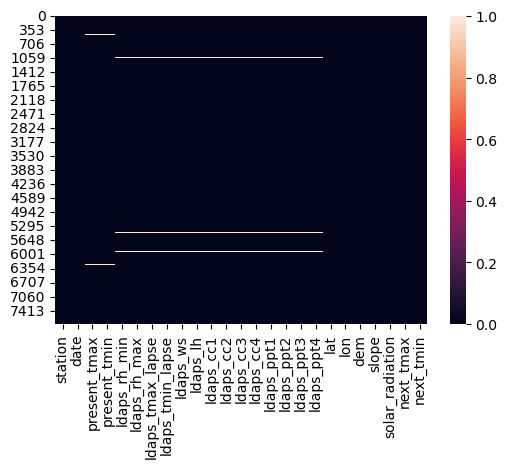

In [12]:
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull())

# with the help of heatmap also we can clearly seen the presence of NULL VALUES , in the following columns of dataset.

In [13]:
null_positions = np.where(df['date'].isnull())[0]
print("Null positions in column 'date':", null_positions)

# here from the above we can find that the NULL-VALUES are present in the column at the END OF THE COLUMN.
# so firt we have to check them...

Null positions in column 'date': [7750 7751]


In [14]:
df['date'].tail(10)
# here below we can see them
# there are only two NULL VALUES are present inside the column and it is at end,....
# .....before this the dates are contineous in INCREASING-ORDER ....
# so we can also REPLACE THOSE LAST TWO NULL VLAUES WITH THE JUST-BEFORE EARLIER DATES.

7742   2017-08-30
7743   2017-08-30
7744   2017-08-30
7745   2017-08-30
7746   2017-08-30
7747   2017-08-30
7748   2017-08-30
7749   2017-08-30
7750          NaT
7751          NaT
Name: date, dtype: datetime64[ns]

In [15]:
df.loc[df.index[7750], 'date'] = ' 2017-08-30'
df.loc[df.index[7751], 'date'] = ' 2017-08-30'

In [16]:
df['date'].tail(5)
# here we are succesfully replaced the NULL VALUES with the RELEVANT EARLIER DATES of the column.

7747   2017-08-30
7748   2017-08-30
7749   2017-08-30
7750   2017-08-30
7751   2017-08-30
Name: date, dtype: datetime64[ns]

In [17]:
df.isnull().sum()
# Now here also we can clearly see that there is NO PRESENCE OF NULL VALUES in DATE column.

station              2
date                 0
present_tmax        70
present_tmin        70
ldaps_rh_min        75
ldaps_rh_max        75
ldaps_tmax_lapse    75
ldaps_tmin_lapse    75
ldaps_ws            75
ldaps_lh            75
ldaps_cc1           75
ldaps_cc2           75
ldaps_cc3           75
ldaps_cc4           75
ldaps_ppt1          75
ldaps_ppt2          75
ldaps_ppt3          75
ldaps_ppt4          75
lat                  0
lon                  0
dem                  0
slope                0
solar_radiation      0
next_tmax           27
next_tmin           27
dtype: int64

=========  REPLACING NAN VALUES  ==============

In [18]:
# So here above we can find that the NULL VALUES are present in ALL COLUMNS (Float64-dtype)
# therefore we can replace null values of 'float -64' dtypes with MEAN of that column...
# ...because they are all float columns with contineous vlaues, not categorical / object column.

In [19]:
# To Replace the Null-Values from the dataset, we have to import Simple IMputer Librarie.

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
imp = SimpleImputer(strategy="mean")
#  we can replace the null values with the 'MEAN' values present in the columns.
#  so the null values can be replaced by the MEAN values ARRIVED in the column.

In [22]:
nan_columns = ['station', 'present_tmax', 'present_tmin', 'ldaps_rh_min',
       'ldaps_rh_max', 'ldaps_tmax_lapse', 'ldaps_tmin_lapse', 'ldaps_ws',
       'ldaps_lh', 'ldaps_cc1', 'ldaps_cc2', 'ldaps_cc3', 'ldaps_cc4',
       'ldaps_ppt1', 'ldaps_ppt2', 'ldaps_ppt3', 'ldaps_ppt4', 'next_tmax', 'next_tmin']

In [23]:
for i in nan_columns:
    df[i]= imp.fit_transform(df[i].values.reshape(-1,1))
    
# Here we are Replacing all Nan Values Column Together with their Mean of the columns, by using "FOR LOOP"

In [24]:
df.isnull().sum()
# here below we can see that all NAN-VALUES are REPLACED SUCCESSFULLY

station             0
date                0
present_tmax        0
present_tmin        0
ldaps_rh_min        0
ldaps_rh_max        0
ldaps_tmax_lapse    0
ldaps_tmin_lapse    0
ldaps_ws            0
ldaps_lh            0
ldaps_cc1           0
ldaps_cc2           0
ldaps_cc3           0
ldaps_cc4           0
ldaps_ppt1          0
ldaps_ppt2          0
ldaps_ppt3          0
ldaps_ppt4          0
lat                 0
lon                 0
dem                 0
slope               0
solar_radiation     0
next_tmax           0
next_tmin           0
dtype: int64

======== INITIALISING  UNIVARIATE  ANALYSIS  ================================================================================

In [25]:
df.columns

Index(['station', 'date', 'present_tmax', 'present_tmin', 'ldaps_rh_min',
       'ldaps_rh_max', 'ldaps_tmax_lapse', 'ldaps_tmin_lapse', 'ldaps_ws',
       'ldaps_lh', 'ldaps_cc1', 'ldaps_cc2', 'ldaps_cc3', 'ldaps_cc4',
       'ldaps_ppt1', 'ldaps_ppt2', 'ldaps_ppt3', 'ldaps_ppt4', 'lat', 'lon',
       'dem', 'slope', 'solar_radiation', 'next_tmax', 'next_tmin'],
      dtype='object')

In [26]:
all_columns = ['station', 'date', 'present_tmax', 'present_tmin', 'ldaps_rh_min',
       'ldaps_rh_max', 'ldaps_tmax_lapse', 'ldaps_tmin_lapse', 'ldaps_ws',
       'ldaps_lh', 'ldaps_cc1', 'ldaps_cc2', 'ldaps_cc3', 'ldaps_cc4',
       'ldaps_ppt1', 'ldaps_ppt2', 'ldaps_ppt3', 'ldaps_ppt4', 'lat', 'lon',
       'dem', 'slope', 'solar_radiation', 'next_tmax', 'next_tmin']

In [27]:
for i in all_columns:
    nx = df[i].nunique()
    print(i,'====',nx)
    
# here below we can find all the NUMBER OF UNIQUE VALUES PRESENT IN EACH COLUMN.
# from this ,we found that there is no such CATEGORICAL COLUMN in the given DATASET.
# few of the columns = 'lat'  'lon'  'dem'  'slope'  'station'  are having very less values as compared to other columns...
# so there may be a small chances to have some categorical data.

station ==== 25
date ==== 310
present_tmax ==== 168
present_tmin ==== 156
ldaps_rh_min ==== 7673
ldaps_rh_max ==== 7665
ldaps_tmax_lapse ==== 7676
ldaps_tmin_lapse ==== 7676
ldaps_ws ==== 7676
ldaps_lh ==== 7676
ldaps_cc1 ==== 7570
ldaps_cc2 ==== 7583
ldaps_cc3 ==== 7600
ldaps_cc4 ==== 7525
ldaps_ppt1 ==== 2813
ldaps_ppt2 ==== 2511
ldaps_ppt3 ==== 2357
ldaps_ppt4 ==== 1919
lat ==== 12
lon ==== 25
dem ==== 25
slope ==== 27
solar_radiation ==== 1575
next_tmax ==== 184
next_tmin ==== 158


In [28]:
# 1) Analysing STATION COLUMN ====>>>>

In [29]:
df['station'].unique()

# These are the WEATHER STATION NUMBERS , which are from 0 -to- 25....
# that means there are TOTAL 25 NUMBERS OF STATIONS ARE PREESENT.

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.])

In [30]:
# 2) Analysing Date Column ========>>>>>

In [31]:
df['date'].min()

# the minimum 'date ' is 7th JANUARY 2013

Timestamp('2013-01-07 00:00:00')

In [32]:
df['date'].max()

# and the maximum/highest 'date' is 8th december 2017
# that means the data present is in-between the dates from [ 7th JAN-2013 -to- 8th DEC-2017 ] 

Timestamp('2017-12-08 00:00:00')

In [33]:
# 3) Analysing Present-Tmax (i.e Maximum Air Temp. between 0-21 hr on PRESENT DAY )=====>>>>>>

In [34]:
df['present_tmax'].min()
# the least value of Maximum air temperature between 0-21 hr on present day is = 20°C

20.0

In [35]:
df['present_tmax'].max()
# the Highest value of Maximum air temperature between 0-21 hr on present day is = 37.6°C

37.6

In [36]:
# 4) Analysing Present-Tmin (i.e Minimum Air Temp. between 0-21 hr on PRESENT DAY )=====>>>>>>

In [37]:
df['present_tmin'].min()
# the Lowst temp. value noted on present day in between 0-21hrs is = 11.3°C

11.3

In [38]:
df['present_tmin'].max()
# the Highest temp. value noted on present day during the 0-21 hrs is = 29.9°C

29.9

In [39]:
#  Analysing 3rd & 4th Together =====>>

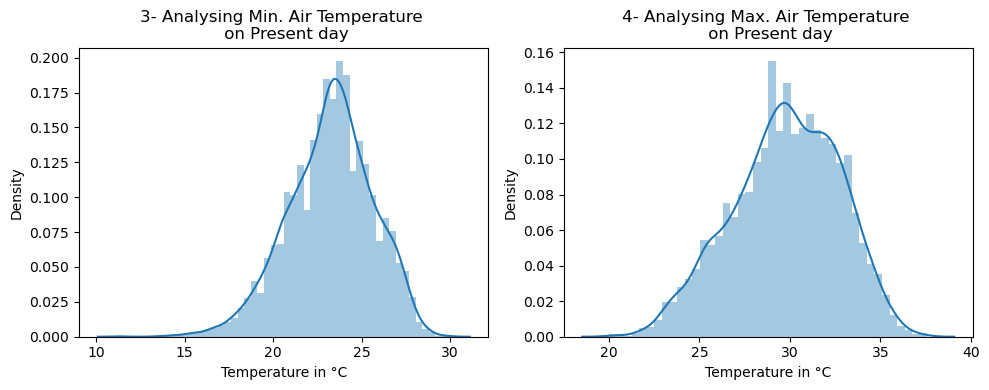

In [40]:
plt.figure(figsize = (10,4), facecolor='white')

plt.subplot(1,2,1)

plt.title('3- Analysing Min. Air Temperature \n on Present day')
sns.distplot(df['present_tmin'])
plt.xlabel('Temperature in °C', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')

plt.subplot(1,2,2)
plt.title('4- Analysing Max. Air Temperature \n on Present day')
sns.distplot(df['present_tmax'])
plt.xlabel('Temperature in °C', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')


plt.tight_layout()
plt.show()

#  ====== PRESENT_Tmin ===========
# here from the below HIstogram we identified that :
# Least Value of Maximum air temp. on Present day = 11.3 °C
# Highest value of Maximum air temp on Present Day = 29.9 °C
# but during the whole 21 Hours on Present day the Maximum temp. is remains in between 22-25 °C,....
# ...and it reaches upto Lowest peak of = 11.3 °C

#  =====PRESENT_Tmax  =============
# here from the below HIstogram we identified that :
# Least Value of Maximum air temp. on Present day = 20 °C
# Highest value of Maximum air temp on Present Day = 37.6 °C
# but during the whole 21 Hours on Present day the Maximum temp. is remains in between 28-32 °C,....
# ...and it reaches upto highest its Highest peak of = 37.6 °C

In [41]:
# so from above both analysis of 3)- present_tmin  &  4)- present_tmax, we found that during the 0-21 hrs of present day....
# ... the LOWEST NOTED TEMPERATURE IS = 11.3 °C
# ... & the HIGHEST NOTED TEMPERATURE IS = 37.6 °C

# ...MOST OF THE TIME LOWEST TEMPERATURE DURING THE PRESENT DAY IS = 22-25°C, but it reaches to the lowest peak of = 11.3 °C
# ...MOST OF THE TIME HIGHEST TEMPERATURE DURING THE PRESENT DAY IS = 29-31 °C , but reaches to highest peak of = 37.6 °C

In [42]:
# 5) Analysing LDAPS model forecast of next-day minimum relative humidity =====>>

In [43]:
df['ldaps_rh_min'].min()
# here we can see the minimum NEXT DAY HUMIDITY FORECAST BY LDAPS MODEL is : 19.79 %

19.79466629

In [44]:
df['ldaps_rh_min'].max()
# the Highest HUMIDITY FORECAST BY LDAPS MODEL FOR NEXT DAY IS :98.52 %

98.5247345

In [45]:
df['ldaps_rh_min'].mean()

56.759372150692954

In [46]:
# 6) Analysing LDAPS model forecast of next-day maximum relative humidity =====>>

In [47]:
df['ldaps_rh_max'].min()
# the minimum RELATIVE HUMIDITY FORECAST FOR NEXT DAY BY LDAPS MODEL IS : 58%

58.93628311

In [48]:
df['ldaps_rh_max'].max()
# the Highest RELATIVE HUMIDITY FORECAST FOR NEXT DAY BY LDAPS MODEL IS : 100 %
# it's a very huge percentage of humidity.

100.0001526

In [49]:
df['ldaps_rh_max'].mean()

88.37480388719061

In [50]:
#  Analysing 5th [ldaps_rh_min] & 6th [ ldaps_rh_max] Together  ============>>>>>>

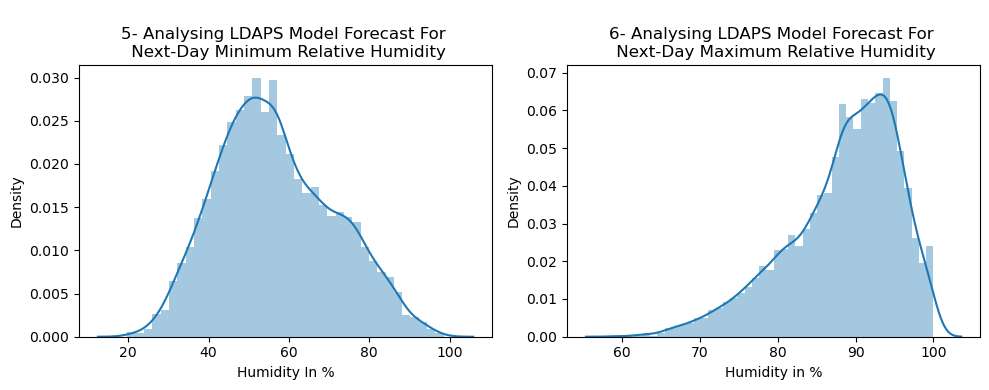

In [51]:
plt.figure(figsize = (10,4), facecolor='white')

plt.subplot(1,2,1)

plt.title('\n5- Analysing LDAPS Model Forecast For \n Next-Day Minimum Relative Humidity')
sns.distplot(df['ldaps_rh_min'])
plt.xlabel('Humidity In %', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')

plt.subplot(1,2,2)
plt.title('\n6- Analysing LDAPS Model Forecast For \n Next-Day Maximum Relative Humidity')
sns.distplot(df['ldaps_rh_max'])
plt.xlabel('Humidity in %', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')


plt.tight_layout()
plt.show()

#  ====== LDAPS_RH_MIN ===========
# here from the below HIstogram we identified that :
# Least Value of Minimum Relative Humidity Forecast by LDAPS is = 19.80 %
# MEAN value of Minimum Relative Humidity Forecast by LDAPS is = 56.75 %
# Highest value of Minimum Relative Humidity Forecast by LDAPS is = 98.52 %
# but the Minimum forecast for during the whole day is remains in between 50 - 55 %,....
# ...and it reaches upto Lowest peak of = 98.52 %

#  =====LDAPS_RH_MAX  =============
# here from the below HIstogram we identified that :
# Least Value of Maximum Relative Humidity Forecast by LDAPS is = 59 %
# MEAN value of Maxximum Relative Humidity Forecast by LDAPS is = 88.37 %
# Highest value of Maximum Relative Humidity Forecast by LDAPS is = 100 %
# but the Maximum forecast for during the whole day is remains in between 90 - 95 %,....
# ...and it reaches upto Lowest peak of = 100 %

#  CONCLUSION = FROM THE ABOVE ANALYSIS WE CONCLUDE THAT , THE FORECAST IS PREDICTING VERY HIGHER HUMIDITY FOR THE NEXT DAY.

In [52]:
# 7) Analysing LDAPS model forecast of next-day, minimum air temperature applied lapse rate ======>>>>

In [53]:
df['ldaps_tmin_lapse'].min()

14.27264631

In [54]:
df['ldaps_tmin_lapse'].mean()

23.512588776279852

In [55]:
df['ldaps_tmin_lapse'].max()

29.61934244

In [56]:
# 8) Analysing LDAPS model forecast of next-day, maximum air temperature applied lapse rate ======>>>>

In [57]:
df['ldaps_tmax_lapse'].min()

17.62495378

In [58]:
df['ldaps_tmax_lapse'].mean()

29.613446542813623

In [59]:
df['ldaps_tmax_lapse'].max()

38.54225522

In [60]:
#  Analysing 7th [ldaps_tmin_lapse]  &  8th [ldaps_tmax_lapse] together ===============>>>>

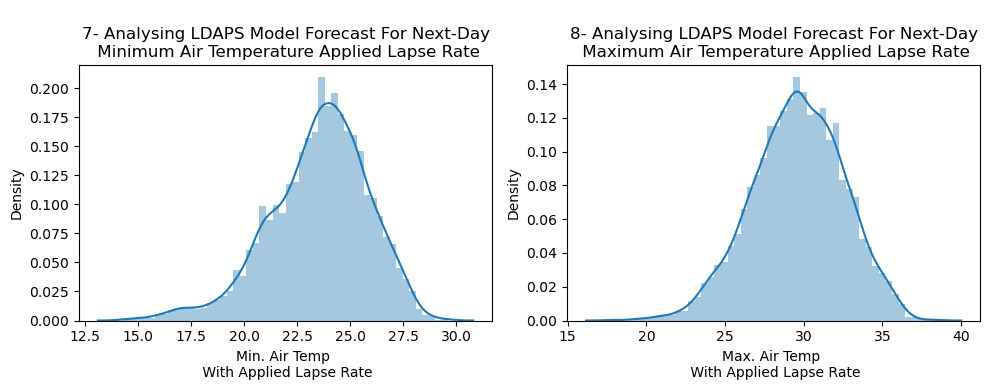

In [61]:
plt.figure(figsize = (10,4), facecolor='white')

plt.subplot(1,2,1)

plt.title('\n7- Analysing LDAPS Model Forecast For Next-Day\n Minimum Air Temperature Applied Lapse Rate')
sns.distplot(df['ldaps_tmin_lapse'])
plt.xlabel('Min. Air Temp \n With Applied Lapse Rate', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')

plt.subplot(1,2,2)
plt.title('\n8- Analysing LDAPS Model Forecast For Next-Day\n Maximum Air Temperature Applied Lapse Rate')
sns.distplot(df['ldaps_tmax_lapse'])
plt.xlabel('Max. Air Temp \n With Applied Lapse Rate', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')


plt.tight_layout()
plt.show()

#  ====== LDAPS_Tmin_Lapse ===========
# here from the below HIstogram we identified that :
# Least Value of Minimum Air Temperature Applied Lapse Rate Forecast by LDAPS For Next Day is = 14
# MEAN value of Minimum Air Temperature Applied Lapse Rate Forecast by LDAPS For Next Day is = 23
# Highest value of Minimum Air Temperature Applied Lapse Rate Forecast by LDAPS For Next Day is = 29
# but the Minimum Temperature Applied Lapse Rate forecast for during the whole day is remains in between 22.5 - 25....
# ...and it reaches upto Lowest peak of = 14

#  =====LDAPS_Tmax_Lapse  =============
# here from the below HIstogram we identified that :
# Least Value of Maximum Air Temperature Applied Lapse Rate Forecast by LDAPS For Next Day is = 17.62
# MEAN value of Maxximum Air Temperature Applied Lapse Rate Forecast by LDAPS For Next Day is = 29.61
# Highest value of Maximum Air Temperature Applied Lapse Rate Forecast by LDAPS For Next Day is = 38.54
# but the Maximum Temperature Applied Lapse Rate forecast for during the whole day is remains in between 28 - 30....
# ...and it reaches upto Lowest peak of = 38.54


In [62]:
# 9) Analysing Average Wind Speed, Forecated by LDAPS Model For Next Day =========>>>>>

In [63]:
df['ldaps_ws'].min()
# the Minimum WindSpeed forecated by LDAPS model for next day is = 2.88 meter/second

2.882579625

In [64]:
df['ldaps_ws'].mean()
# # the Mean of WindSpeed forecated by LDAPS model for next day is = 7 meter/second

7.0978745696253664

In [65]:
df['ldaps_ws'].max()
# the Maximum WindSpeed forecated by LDAPS model for next day is = 21 meter/second
# it is very High

21.85762099

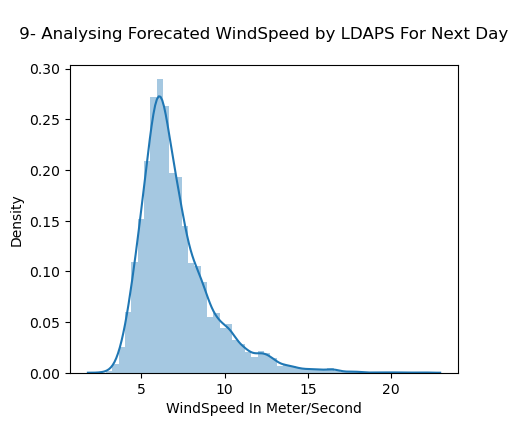

In [66]:
plt.figure(figsize = (5,4), facecolor='white')
plt.title('\n 9- Analysing Forecated WindSpeed by LDAPS For Next Day \n')
sns.distplot(df['ldaps_ws'])
plt.xlabel('WindSpeed In Meter/Second', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.show()

#  ====== WindSpeed ForeCast By LDAPS ===========
# here from the below HIstogram we identified that :
# Least Speed of Wind Forecast by LDAPS For Next Day is = 2.88 m/s
# MEAN Speed of Wind Forecast by LDAPS For Next Day is = 7 m/s
# Highest Speed of WInd Forecast by LDAPS For Next Day is = 21.85 ms
# but the WindSpeed forecast for during the whole day is remains in between 7-9 m/s....
# ...and it reaches upto Lowest peak of = 21.85 m/s

In [67]:
# 10) Analysing Latent Heat Flux Forcast For NextDay By LDAPS ==========>>>>>

In [68]:
df['ldaps_lh'].min()

-13.60321209

In [69]:
df['ldaps_lh'].mean()

62.505018909340606

In [70]:
df['ldaps_lh'].max()

213.4140062

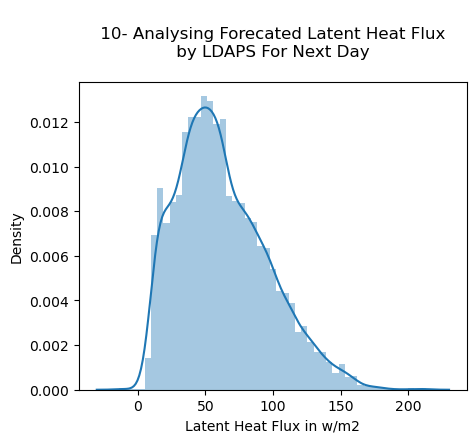

In [71]:
plt.figure(figsize = (5,4), facecolor='white')
plt.title('\n 10- Analysing Forecated Latent Heat Flux \n by LDAPS For Next Day \n')
sns.distplot(df['ldaps_lh'])
plt.xlabel('Latent Heat Flux in w/m2', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.show()

#  ====== Latent HeatFlux ForeCast By LDAPS ===========
# here from the below HIstogram we identified that :
# Least value of Latent Heat Flux Forecast by LDAPS For Next Day is = -13.60 w/m2
# MEAN Vlaue of Latent Heat Flux Forecast by LDAPS For Next Day is = 62.50 w/m2
# Highest Value of Latent Heat Flux Forecast by LDAPS For Next Day is = 213.41 w/m2
# but the Latent Heat Flux forecast for during the whole day is remains in between 50-60 w/m2....
# ...and it reaches upto Lowest peak of = 213.41 w/m2

In [72]:
# 11) Analysing 1st 6-hour split-  average cloud cover forecated by LDAPS ====>>>>

In [73]:
df['ldaps_cc1'].min()

0.0

In [74]:
df['ldaps_cc1'].mean()

0.3687735855982822

In [75]:
df['ldaps_cc1'].max()

0.967277328

In [76]:
# 12) Analysing 2nd 6-hour split - average cloud cover forecated by LDAPS ====>>>>

In [77]:
df['ldaps_cc2'].min()

0.0

In [78]:
df['ldaps_cc2'].mean()

0.3560804372839663

In [79]:
df['ldaps_cc2'].max()

0.96835306

In [80]:
# 13) Analysing 3rd 6-hour split-  average cloud cover forecated by LDAPS ====>>>>

In [81]:
df['ldaps_cc3'].min()

0.0

In [82]:
df['ldaps_cc3'].mean()

0.31840395582141495

In [83]:
df['ldaps_cc3'].max()

0.983788755

In [84]:
# 14) Analysing 4th 6-hour split-  average cloud cover forecated by LDAPS ====>>>>

In [85]:
df['ldaps_cc4'].min()

0.0

In [86]:
df['ldaps_cc4'].mean()

0.29919138891453695

In [87]:
df['ldaps_cc4'].max()

0.974709524

In [88]:
# Analysing 11th [cc1], 12th[cc2], 13th [cc3] & 14th[cc4] all together =========>>>>>>

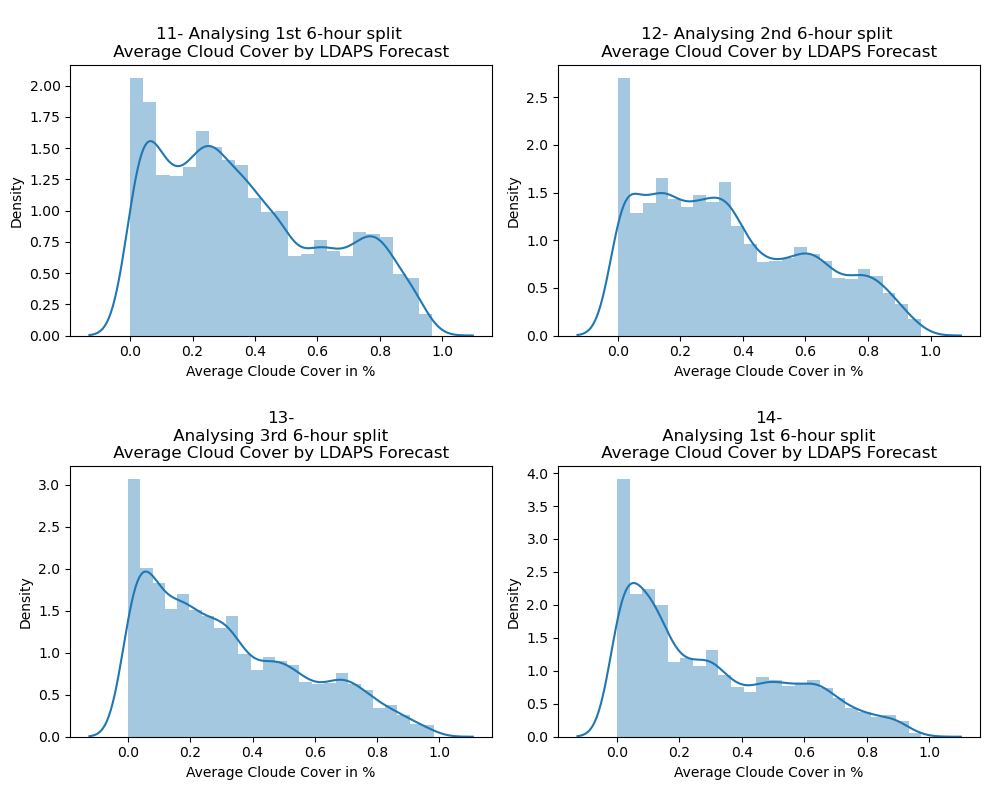

In [89]:
plt.figure(figsize = (10,8), facecolor='white')

plt.subplot(2,2,1)

plt.title('\n11- Analysing 1st 6-hour split \n Average Cloud Cover by LDAPS Forecast ')
sns.distplot(df['ldaps_cc1'])
plt.xlabel('Average Cloude Cover in %', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')

plt.subplot(2,2,2)
plt.title('\n12- Analysing 2nd 6-hour split \n Average Cloud Cover by LDAPS Forecast ')
sns.distplot(df['ldaps_cc2'])
plt.xlabel('Average Cloude Cover in %', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')

plt.subplot(2,2,3)
plt.title('\n13-\n Analysing 3rd 6-hour split \n Average Cloud Cover by LDAPS Forecast ')
sns.distplot(df['ldaps_cc3'])
plt.xlabel('Average Cloude Cover in %', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')

plt.subplot(2,2,4)
plt.title('\n14-\n Analysing 1st 6-hour split \n Average Cloud Cover by LDAPS Forecast ')
sns.distplot(df['ldaps_cc4'])
plt.xlabel('Average Cloude Cover in %', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')


plt.tight_layout()
plt.show()



In [90]:
#  ====== 1st- 6hr split- Average Cloude Cover ===========
# here from the below HIstogram we identified that :
# Least Value of 1st- 6hr split- Average Cloude Cover Forecast by LDAPS For Next Day is = 0.00 %
# MEAN value of 1st- 6hr split- Average Cloude Cover Forecast by LDAPS For Next Day is = 0.36 %
# Highest value of 1st- 6hr split- Average Cloude Cover Forecast by LDAPS For Next Day is = 0.96 %

#  ====== 2nd- 6hr split- Average Cloude Cover ===========
# here from the below HIstogram we identified that :
# Least Value of 2nd- 6hr split- Average Cloude Cover Forecast by LDAPS For Next Day is = 0.00 %
# MEAN value of 2nd- 6hr split- Average Cloude Cover Forecast by LDAPS For Next Day is = 0.35 %
# Highest value of 2nd- 6hr split- Average Cloude Cover Forecast by LDAPS For Next Day is = 0.96 %

#  ====== 3rd- 6hr split- Average Cloude Cover ===========
# here from the below HIstogram we identified that :
# Least Value of 3rd- 6hr split- Average Cloude Cover Forecast by LDAPS For Next Day is = 0.00 %
# MEAN value of 3rd- 6hr split- Average Cloude Cover Forecast by LDAPS For Next Day is = 0.31 %
# Highest value of 3rd- 6hr split- Average Cloude Cover Forecast by LDAPS For Next Day is = 0.98 %


#  ====== 4th- 6hr split- Average Cloude Cover ===========
# here from the below HIstogram we identified that :
# Least Value of 4th- 6hr split- Average Cloude Cover Forecast by LDAPS For Next Day is = 0.00 %
# MEAN value of 4th- 6hr split- Average Cloude Cover Forecast by LDAPS For Next Day is = 0.29 %
# Highest value of 4th- 6hr split- Average Cloude Cover Forecast by LDAPS For Next Day is = 0.97 %



In [91]:
df.columns

Index(['station', 'date', 'present_tmax', 'present_tmin', 'ldaps_rh_min',
       'ldaps_rh_max', 'ldaps_tmax_lapse', 'ldaps_tmin_lapse', 'ldaps_ws',
       'ldaps_lh', 'ldaps_cc1', 'ldaps_cc2', 'ldaps_cc3', 'ldaps_cc4',
       'ldaps_ppt1', 'ldaps_ppt2', 'ldaps_ppt3', 'ldaps_ppt4', 'lat', 'lon',
       'dem', 'slope', 'solar_radiation', 'next_tmax', 'next_tmin'],
      dtype='object')

In [92]:
# 15) Analysing 1st 6-hour split- Average Precipitation Chances ===========>>>

In [93]:
print (df['ldaps_ppt1'].min())
print (df['ldaps_ppt1'].mean())
print (df['ldaps_ppt1'].max())

# here below we can find that:
# average chances of PRECIPITATION is : 0.59 % only
# Maximum Chances of PRECIPITATION is : 23.70 %

0.0
0.5919945266984491
23.70154408


In [94]:
# 16) Analysing 2nd 6-hour split- Average Precipitation Chances ===========>>>

In [95]:
print (df['ldaps_ppt2'].min())
print (df['ldaps_ppt2'].mean())
print (df['ldaps_ppt2'].max())

# here below we can find that:
# average chances of PRECIPITATION is : 0.48 % only
# Maximum Chances of PRECIPITATION is : 21.62 %

0.0
0.4850025590969116
21.62166078


In [96]:
# 17) Analysing 3rd 6-hour split- Average Precipitation Chances ===========>>>

In [97]:
print (df['ldaps_ppt3'].min())
print (df['ldaps_ppt3'].mean())
print (df['ldaps_ppt3'].max())

# here below we can find that:
# average chances of PRECIPITATION is : 0.24 % only
# Maximum Chances of PRECIPITATION is : 15.84 %

0.0
0.27819963927471697
15.84123484


In [98]:
# 18) Analysing 4th 6-hour split- Average Precipitation Chances ===========>>>

In [99]:
print (df['ldaps_ppt4'].min())
print (df['ldaps_ppt4'].mean())
print (df['ldaps_ppt4'].max())

# here below we can find that:
# average chances of PRECIPITATION is : 0.26 % only
# Maximum Chances of PRECIPITATION is : 16.65 %

0.0
0.26940734997772514
16.65546921


In [100]:
# Analysing 15th[ppt1], 16th[ppt2], 17th[ppt3], & 18th[ppt4] all Together ============>>>>>>

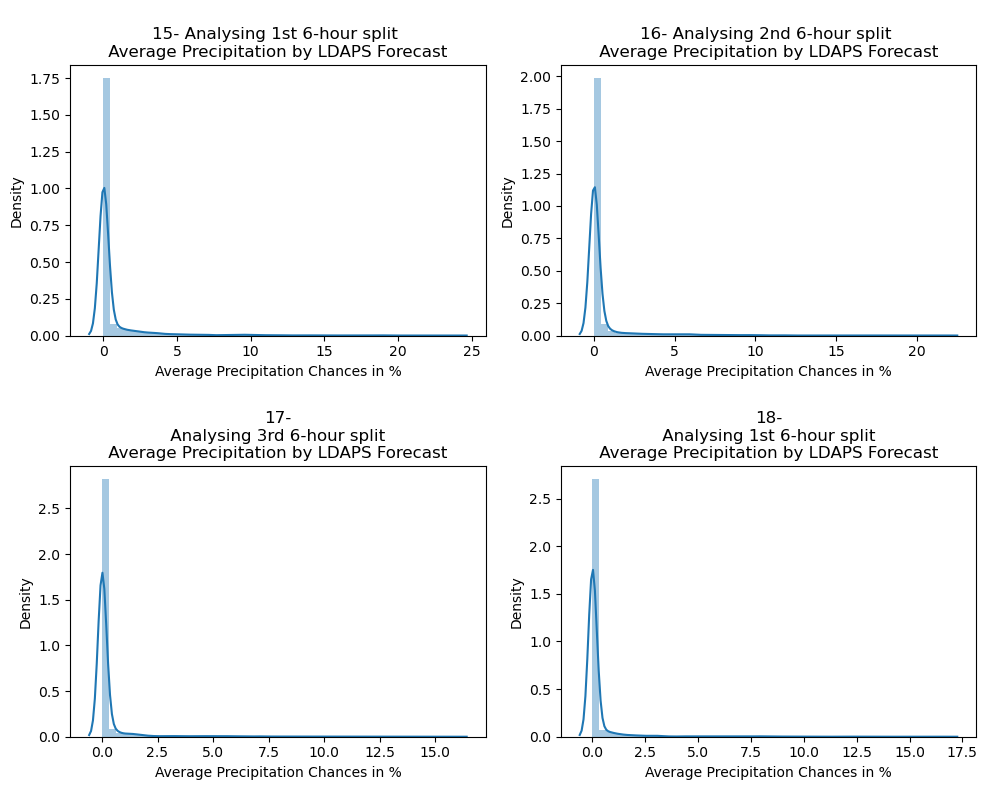

In [101]:
plt.figure(figsize = (10,8), facecolor='white')

plt.subplot(2,2,1)

plt.title('\n15- Analysing 1st 6-hour split \n Average Precipitation by LDAPS Forecast ')
sns.distplot(df['ldaps_ppt1'])
plt.xlabel('Average Precipitation Chances in %', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')

plt.subplot(2,2,2)
plt.title('\n16- Analysing 2nd 6-hour split \n Average Precipitation by LDAPS Forecast ')
sns.distplot(df['ldaps_ppt2'])
plt.xlabel('Average Precipitation Chances in %', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')

plt.subplot(2,2,3)
plt.title('\n17-\n Analysing 3rd 6-hour split \n Average Precipitation by LDAPS Forecast ')
sns.distplot(df['ldaps_ppt3'])
plt.xlabel('Average Precipitation Chances in %', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')

plt.subplot(2,2,4)
plt.title('\n18-\n Analysing 1st 6-hour split \n Average Precipitation by LDAPS Forecast ')
sns.distplot(df['ldaps_ppt4'])
plt.xlabel('Average Precipitation Chances in %', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')


plt.tight_layout()
plt.show()

# here from the below analysis we can find that the AVERAGE PRECIPITATION CHANCES FOR NEXT DAY IS VERY LOW.

In [102]:
# 19) Analysing Lattitude Column ====>>>

In [103]:
df['lat'].nunique()

12

In [104]:
df['lat'].value_counts()

37.5776    1240
37.5507    1240
37.6046     620
37.5102     620
37.4697     620
37.4967     620
37.5372     620
37.6181     620
37.5237     620
37.6450     311
37.4562     311
37.4832     310
Name: lat, dtype: int64

In [105]:
# 20) Analysing Longitude column ====>>>>

In [106]:
df['lon'].nunique()

25

In [107]:
df['lon'].value_counts()
# here we can see that all values are almost equally divided to all longitudes.
# but the no. of unique values in longitude are double of lattitude

127.135    311
126.826    311
126.991    310
126.937    310
126.909    310
126.891    310
127.086    310
127.040    310
127.004    310
126.938    310
127.024    310
127.099    310
126.995    310
127.083    310
126.927    310
127.032    310
126.988    310
127.085    310
126.955    310
126.910    310
126.838    310
127.042    310
127.022    310
127.058    310
126.970    310
Name: lon, dtype: int64

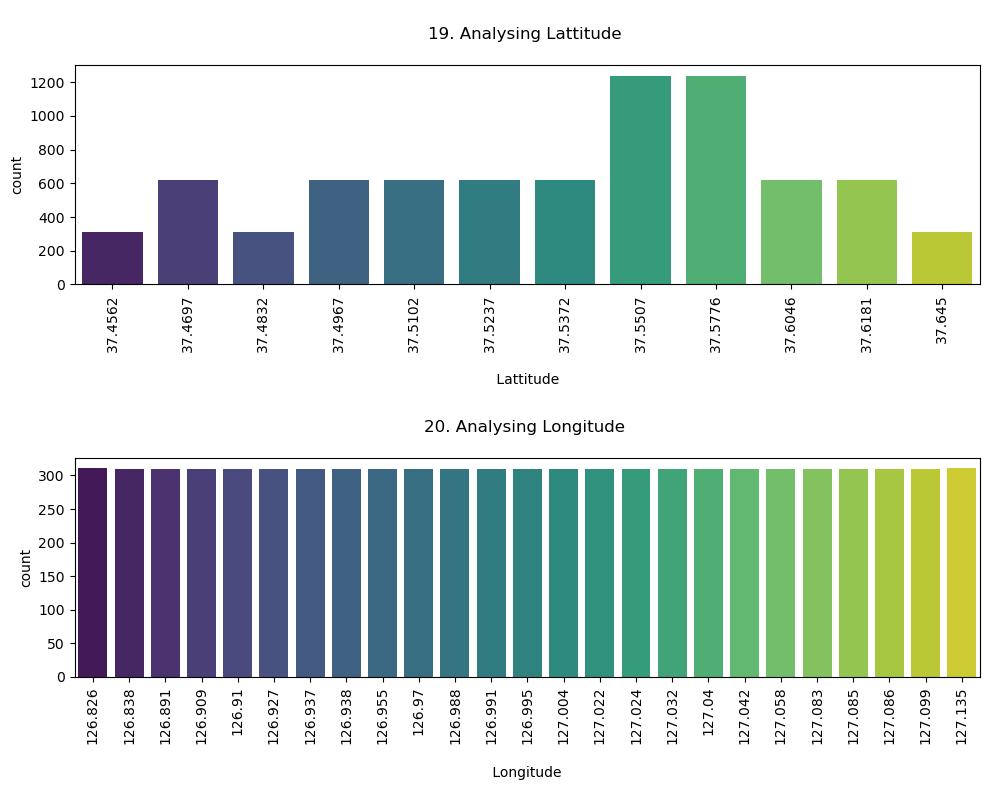

In [108]:
plt.figure(figsize = (10,8), facecolor='white')

plt.subplot(2,1,1)
plt.title('\n19. Analysing Lattitude \n')
sns.countplot (x= 'lat', data= df, palette = "viridis")
# plt.xticks(rotation=30, ha = 'right')
plt.xlabel('\n Lattitude ')
plt.xticks (rotation = 90, ha= 'center')
# plt.ylabel('')
# plt.yticks (rotation = 0, ha='center')
# plt.legend(loc= 'center', fontsize=6)

plt.subplot(2,1,2)
plt.title('\n20. Analysing Longitude \n')
sns.countplot (x= 'lon', data= df, palette = "viridis")
# plt.xticks(rotation=30, ha = 'right')
plt.xlabel('\n Longitude ')
plt.xticks (rotation = 90, ha= 'center')
# plt.ylabel('')
# plt.yticks (rotation = 0, ha='center')
# plt.legend(loc= 'center', fontsize=6)

plt.tight_layout()
plt.show()

# Maximum values are assigned with Lattitude- 37.55 & 37.57 is 1240
# then second Highest values are assigned with Lattitude of 37.46,37.49,37.51,37.52,37.53,37.60,37.61, are =  620 with each
# last 37.45,37.46 & 37.48 are having 311,311 & 310 values

In [109]:
# 21) Analysing Elevation (dem) ======>>>>>

In [110]:
df['dem'].nunique()

25

In [111]:
df['dem'].value_counts()

212.3350    311
12.3700     311
30.9680     310
17.2956     310
15.5876     310
21.9668     310
26.2980     310
146.5540    310
75.0924     310
56.4448     310
53.4712     310
82.2912     310
30.0464     310
59.8324     310
44.7624     310
132.1180    310
28.7000     310
208.5070    310
50.9312     310
52.5180     310
54.6384     310
35.0380     310
45.7160     310
33.3068     310
19.5844     310
Name: dem, dtype: int64

In [112]:
df['dem'].min()
# minimum elevation value present in the colunm is 12.37

12.37

In [113]:
df['dem'].max()
# maximum elevation value present in the column is 212.335

212.335

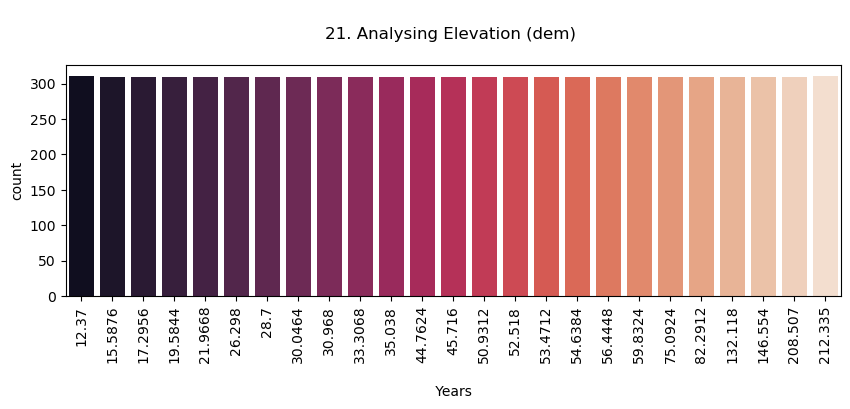

In [114]:
plt.figure (figsize = (10,3), facecolor = "white")
plt.title('\n21. Analysing Elevation (dem) \n')
sns.countplot (x= 'dem', data= df, palette = "rocket")
# plt.xticks(rotation=30, ha = 'right')
plt.xlabel('\n Years ')
plt.xticks (rotation = 90, ha= 'center')
# plt.ylabel('')
# plt.yticks (rotation = 0, ha='center')
# plt.legend(loc= 'center', fontsize=6)
plt.show()

#  here we can that the Average prices are Higher in the year 2017.
#  whereas in 2015, 2016 & 2018 the Average Prices are Almost Same.

In [115]:
# 22) Analysing SLope ======>>>>

In [116]:
df['slope'].nunique()

27

In [117]:
df['slope'].value_counts()

2.785000    310
0.514100    310
0.271300    310
0.222300    310
0.155400    310
0.133200    310
0.572100    310
4.729600    310
1.767800    310
1.231300    310
0.697000    310
2.257900    310
0.855200    310
0.618000    310
2.686500    310
0.593100    310
0.623300    310
5.178200    310
0.412500    310
1.562900    310
0.098500    310
0.145700    310
0.505500    310
2.534800    310
0.266100    310
0.098475      1
5.178230      1
Name: slope, dtype: int64

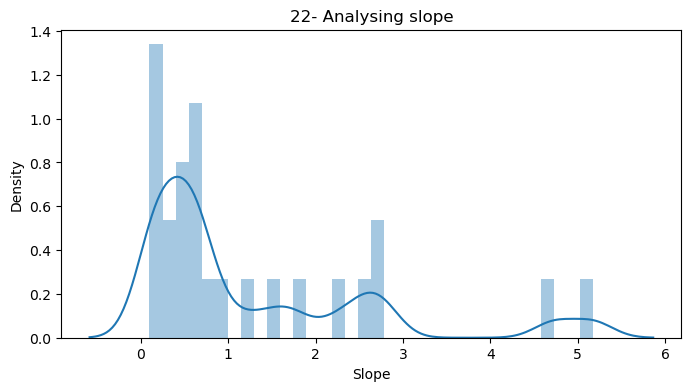

In [118]:
plt.figure(figsize = (8,4), facecolor='white')
plt.title('22- Analysing slope')
sns.distplot(df['slope'])
plt.xlabel('Slope', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.show()

# here from the below distplot we can find that as the 'slope value' is increasing the density of graph is deacreasing.

In [119]:
# 23) Analysing solar radiation======>>>>

In [120]:
df['solar_radiation'].nunique()
# there are no such unique values are present in the column.

1575

In [121]:
df['solar_radiation'].min()
# the minimum value for DAILY INCOMING SOLAR RADIATION is 4329.52 wh/m2

4329.520508

In [122]:
df['solar_radiation'].max()
# the maximum value for daily incoming solar radiation is 5992.89 wh/m2

5992.895996

In [123]:
df['solar_radiation'].mean()
# the MEAN VALUE FOR THE DAILY INCOMING SOLAR RADIATION IS = 5341 WH/M2

5341.50280266135

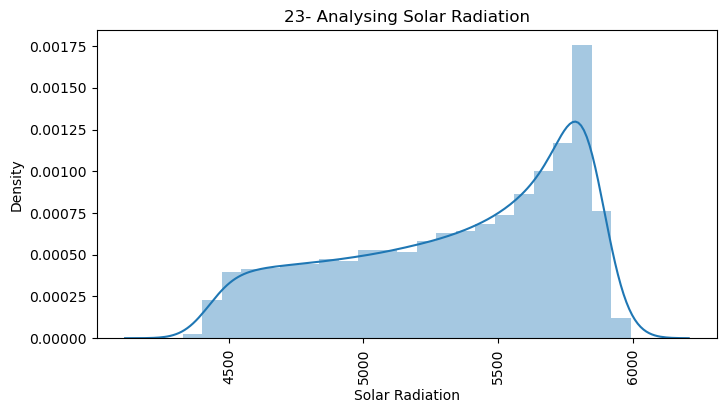

In [124]:
plt.figure(figsize = (8,4), facecolor='white')
plt.title('23- Analysing Solar Radiation')
sns.distplot(df['solar_radiation'])
plt.xlabel('Solar Radiation', fontsize = 10)
plt.xticks(rotation=90,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.show()

# here from the below distplot we can find that as the 'SOLAR RADIATIONs' are INCREASING GRADUALLY AS THE DAY-TIME INCREASING.
# THE HIGHEST SOLAR RADIATIONS ARE NEAR ABOUT 5700-5800 WH/M2

In [125]:
# 24) Analysig Next Day Maximum Air Temperature =====>>>

In [126]:
print(df['next_tmax'].nunique())
print(df['next_tmax'].min())
print(df['next_tmax'].max())
print(df['next_tmax'].mean())

# here below we can see the NUMBER OF UNIQUE VALUES PRESENT IN THE COLUMN IS = 184
# THE LOWEST VALUE FOR THE NEAXT DAY MAXIMUM TEMPERATURE IS = 17.4 °C
# THE HIGHEST VALUE FOR THE NEXT DAY MAXIMUM TEMPERATURE IS = 38.9 °C
# AND THE MEAN VALUE FOR THE NEXT DAY MAXIMUM TEMPERATURE IS = 30.27 °C

184
17.4
38.9
30.27488673139157


In [127]:
# 25) Analysing NEXT DAY MINIMUM AIR TEMPERATURE ======>>>>

In [128]:
print(df['next_tmin'].nunique())
print(df['next_tmin'].min())
print(df['next_tmin'].max())
print(df['next_tmin'].mean())

# here below we can see the NUMBER OF UNIQUE VALUES PRESENT IN THE COLUMN IS = 158
# THE LOWEST VALUE FOR THE NEAXT DAY MINIMUM TEMPERATURE IS = 11.3 °C
# THE HIGHEST VALUE FOR THE NEXT DAY MINIMUM TEMPERATURE IS = 29.8 °C
# AND THE MEAN VALUE FOR THE NEXT DAY MINIMUM TEMPERATURE IS = 22.93 °C

158
11.3
29.8
22.932220064724902


In [129]:
# 23 & 24 ) Analysing both 'next_tmin' & 'next_tmax'  =====>>>

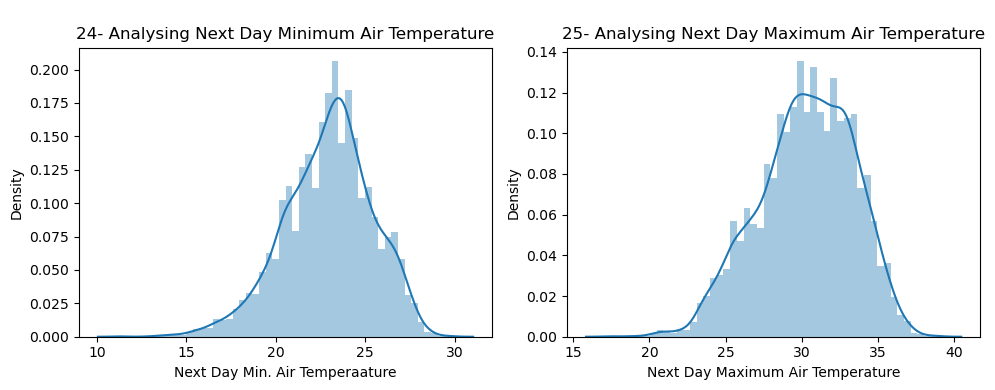

In [130]:
plt.figure(figsize = (10,4), facecolor='white')

plt.subplot(1,2,1)

plt.title('\n24- Analysing Next Day Minimum Air Temperature')
sns.distplot(df['next_tmin'])
plt.xlabel('Next Day Min. Air Temperaature', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')

plt.subplot(1,2,2)
plt.title('\n25- Analysing Next Day Maximum Air Temperature')
sns.distplot(df['next_tmax'])
plt.xlabel('Next Day Maximum Air Temperature', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')


plt.tight_layout()
plt.show()

# =======Next Day Minimum Air Temperature =======
# here below we can see the NUMBER OF UNIQUE VALUES PRESENT IN THE COLUMN IS = 158
# THE LOWEST VALUE FOR THE NEAXT DAY MINIMUM TEMPERATURE IS = 11.3 °C
# THE HIGHEST VALUE FOR THE NEXT DAY MINIMUM TEMPERATURE IS = 29.8 °C
# AND THE MEAN VALUE FOR THE NEXT DAY MINIMUM TEMPERATURE IS = 22.93 °C


# ======= Next Day Maximum Air Temperature ======
# here below we can see the NUMBER OF UNIQUE VALUES PRESENT IN THE COLUMN IS = 184
# THE LOWEST VALUE FOR THE NEAXT DAY MAXIMUM TEMPERATURE IS = 17.4 °C
# THE HIGHEST VALUE FOR THE NEXT DAY MAXIMUM TEMPERATURE IS = 38.9 °C
# AND THE MEAN VALUE FOR THE NEXT DAY MAXIMUM TEMPERATURE IS = 30.27 °C

============================= UPTO HERE EDA PART IS COMPLETED =====================================

=========  INTIALISING  BIVARIATE /  MULTIVARIATE ANALYSIS  ======================

In [131]:
df.columns

Index(['station', 'date', 'present_tmax', 'present_tmin', 'ldaps_rh_min',
       'ldaps_rh_max', 'ldaps_tmax_lapse', 'ldaps_tmin_lapse', 'ldaps_ws',
       'ldaps_lh', 'ldaps_cc1', 'ldaps_cc2', 'ldaps_cc3', 'ldaps_cc4',
       'ldaps_ppt1', 'ldaps_ppt2', 'ldaps_ppt3', 'ldaps_ppt4', 'lat', 'lon',
       'dem', 'slope', 'solar_radiation', 'next_tmax', 'next_tmin'],
      dtype='object')

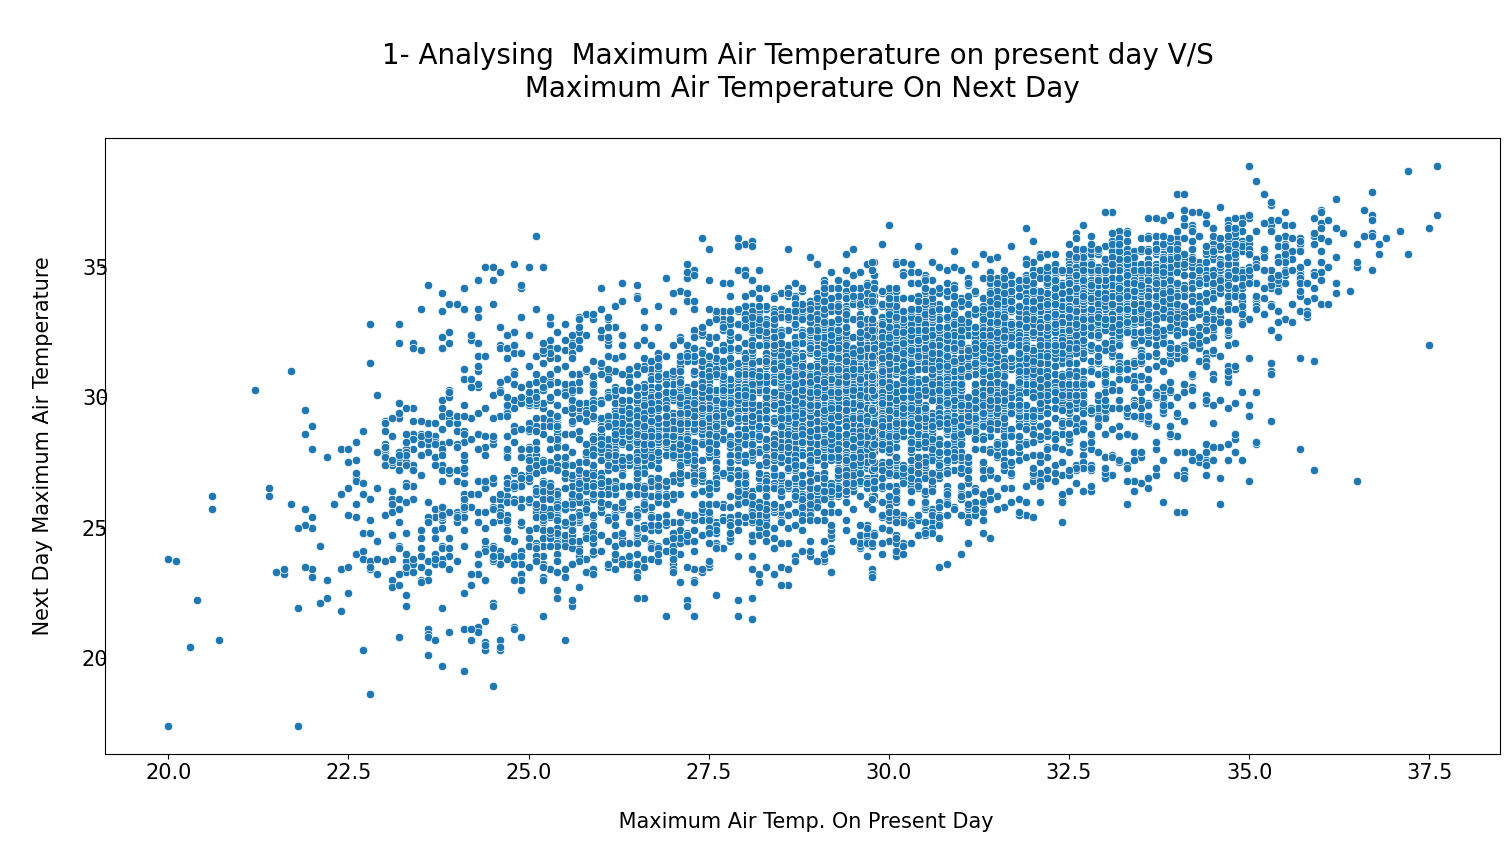

In [132]:

plt.figure(figsize = (18,8), facecolor='white')
plt.title('\n1- Analysing  Maximum Air Temperature on present day V/S \n Maximum Air Temperature On Next Day \n', fontsize=20)
sns.scatterplot(x='present_tmax',y='next_tmax', data=df)
plt.xlabel('\n Maximum Air Temp. On Present Day', fontsize = 15)
plt.xticks(rotation=0,ha ='center',fontsize=15)
plt.ylabel('\n Next Day Maximum Air Temperature \n', fontsize = 15)
plt.yticks(rotation=0, ha = 'center',fontsize=15)
plt.show()

# here in the below scatter plot , we find that the maximum air temperature on present day is POSITIVELY CORELATED with the...
# ...maximum air temperature on next day.

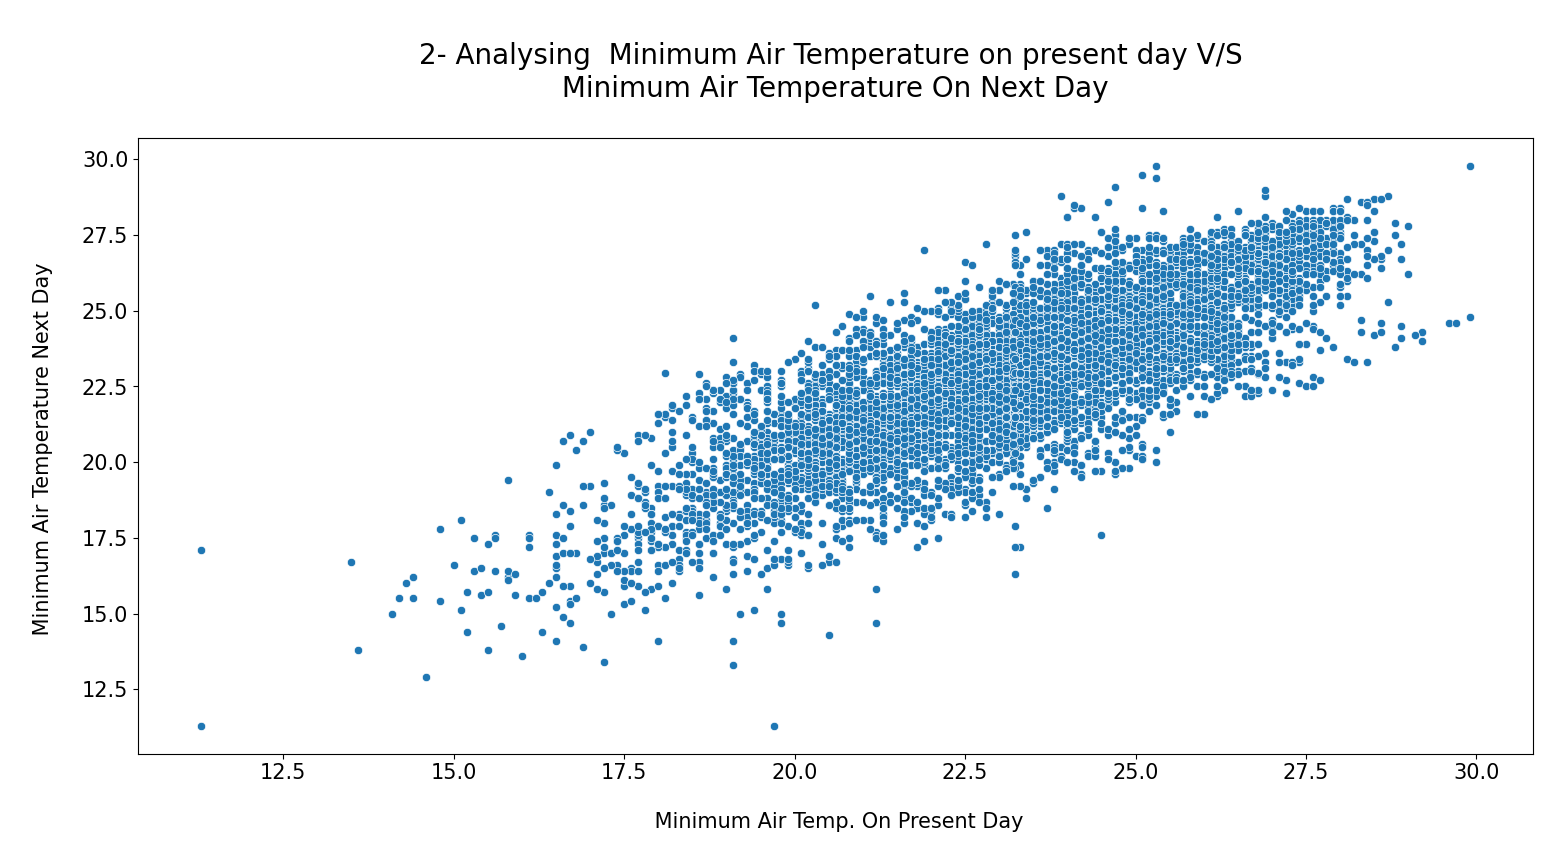

In [133]:

plt.figure(figsize = (18,8), facecolor='white')
plt.title('\n2- Analysing  Minimum Air Temperature on present day V/S \n Minimum Air Temperature On Next Day \n', fontsize=20)
sns.scatterplot(x='present_tmin',y='next_tmin', data=df)
plt.xlabel('\n Minimum Air Temp. On Present Day', fontsize = 15)
plt.xticks(rotation=0,ha ='center',fontsize=15)
plt.ylabel('\n Minimum Air Temperature Next Day  \n', fontsize = 15)
plt.yticks(rotation=0, ha = 'right',fontsize=15)
plt.show()

# here also we can see the POSITVE CORRELATION between MIN. AIR TEMP. ON PRESENT DAY & MIN. AIR TEMP ON NEXT DAY

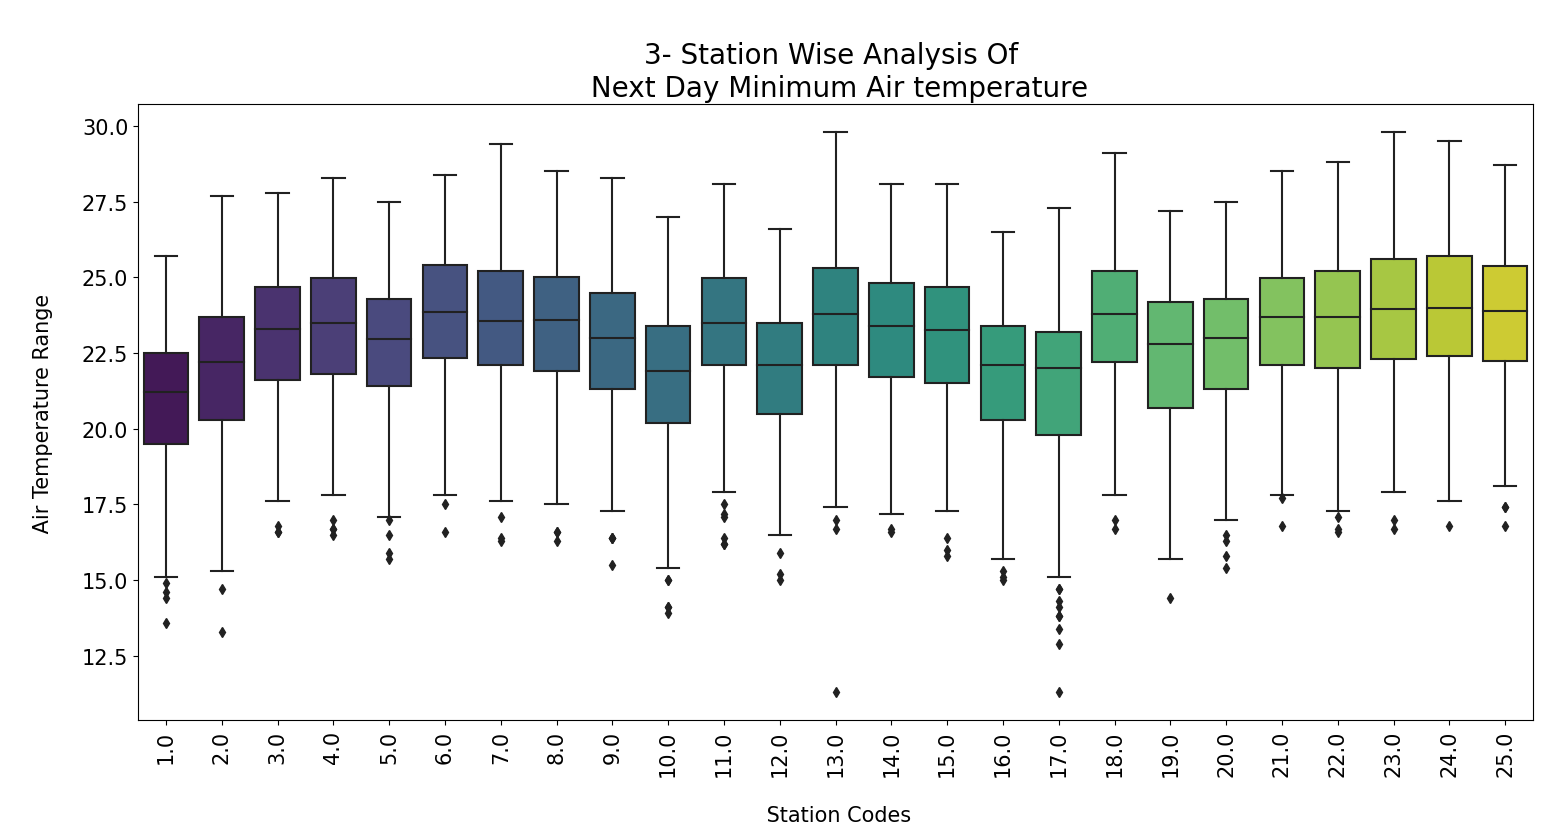

In [134]:

plt.figure(figsize = (18,8), facecolor='white')
plt.title('\n3- Station Wise Analysis Of \n Next Day Minimum Air temperature', fontsize=20)
sns.boxplot(x='station',y='next_tmin', data=df,palette='viridis')
plt.xlabel('\n Station Codes', fontsize = 15)
plt.xticks(rotation=90,ha ='center',fontsize=15)
plt.ylabel('\n Air Temperature Range \n', fontsize = 15)
plt.yticks(rotation=0, ha = 'right',fontsize=15)
plt.show()

# here in the below boxplot we can find the :
# Station NO.-17 will having THE MINIMUM TEMPERATURE FOR NEXT DAY
# Station No.-13 will also have MINIMUM TEMPERATURE FOR NEXT DAY (it could be considered as a outlier)
# alomost all stations are having are having MINIMUM AIR TEMPERATURE FOR NEXT DAY, IN THE RANGE OF = 15 - 17.5 C
# and the AVERAGE MINIMUM TEMPERATURE FOR ALL STATIONS IS IN BETWEEN THE RANGE OF = 20 - 25 C

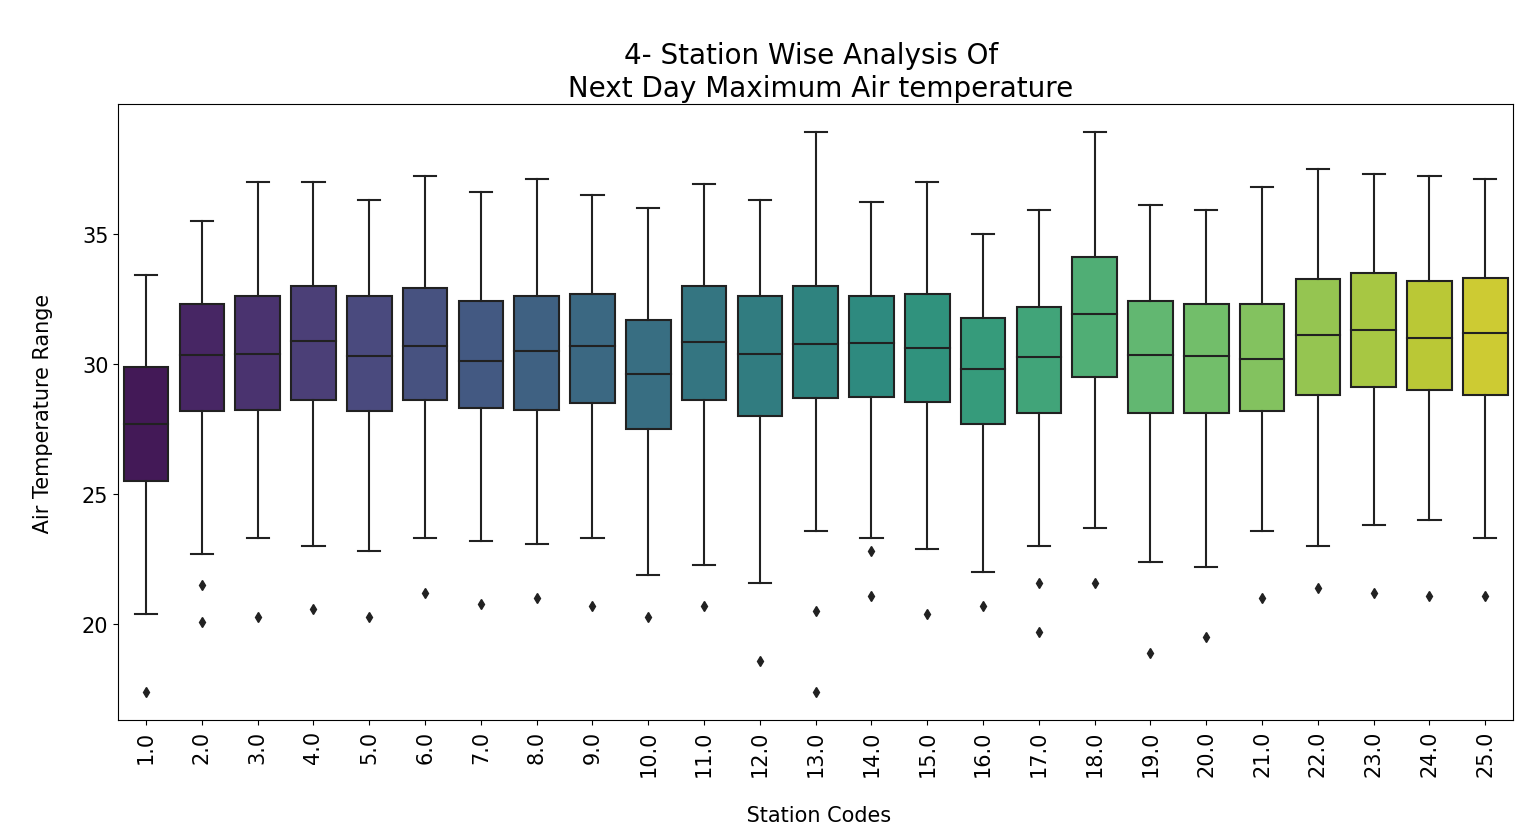

In [135]:

plt.figure(figsize = (18,8), facecolor='white')
plt.title('\n4- Station Wise Analysis Of \n Next Day Maximum Air temperature', fontsize=20)
sns.boxplot(x='station',y='next_tmax', data=df,palette='viridis')
plt.xlabel('\n Station Codes', fontsize = 15)
plt.xticks(rotation=90,ha ='center',fontsize=15)
plt.ylabel('\n Air Temperature Range \n', fontsize = 15)
plt.yticks(rotation=0, ha = 'right',fontsize=15)
plt.show()

# here in the below boxplot we can find the :
# Station NO.-13 & 18 will having THE MAXIMUM TEMPERATURE FOR NEXT DAY = ABOVE 35 C
# alomost all stations are having are having MAXIMUM AIR TEMPERATURE FOR NEXT DAY, IN THE RANGE OF = 35 -37 C
# and the AVERAGE MAXIMUM TEMPERATURE FOR ALL STATIONS IS IN BETWEEN THE RANGE OF = 28 - 32 C

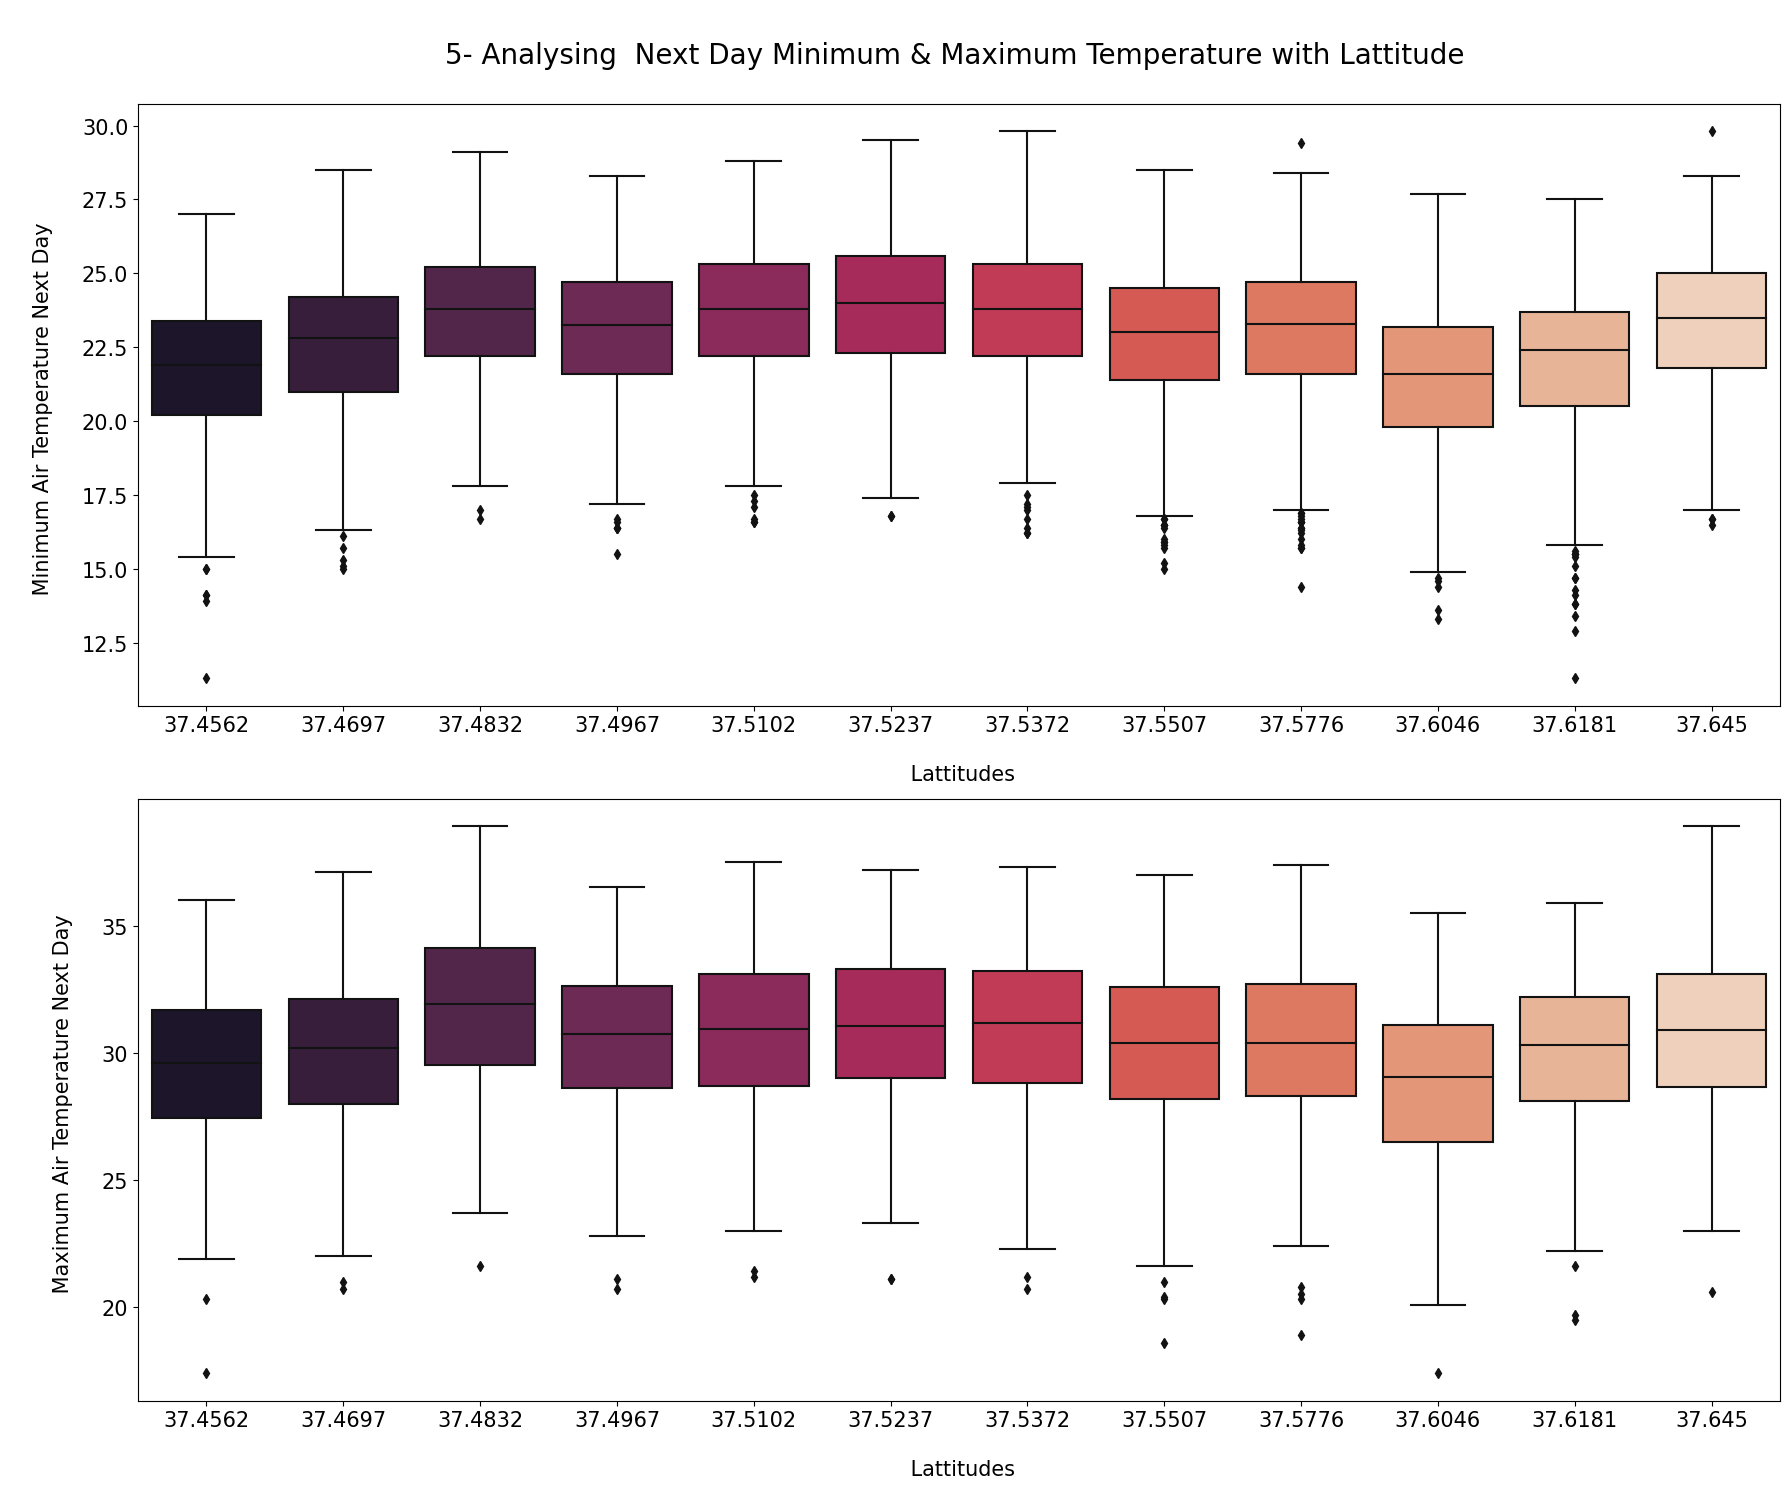

In [136]:

plt.figure(figsize = (18,15), facecolor='white')

plt.subplot(2,1,1)

plt.title('\n5- Analysing  Next Day Minimum & Maximum Temperature with Lattitude \n', fontsize=20)
sns.boxplot(x='lat',y='next_tmin', data=df,palette='rocket')
plt.xlabel('\n Lattitudes', fontsize = 15)
plt.xticks(rotation=0,ha ='center',fontsize=15)
plt.ylabel('\n Minimum Air Temperature Next Day  \n', fontsize = 15)
plt.yticks(rotation=0, ha = 'right',fontsize=15)

plt.subplot(2,1,2)
# plt.title('\n5- Analysing  Next Day Maximum Temperature with Lattitude \n', fontsize=20)
sns.boxplot(x='lat',y='next_tmax', data=df,palette='rocket')
plt.xlabel('\n Lattitudes', fontsize = 15)
plt.xticks(rotation=0,ha ='center',fontsize=15)
plt.ylabel('\n Maximum Air Temperature Next Day  \n', fontsize = 15)
plt.yticks(rotation=0, ha = 'right',fontsize=15)

plt.tight_layout()
plt.show()

# here in the below boxplot we can find the MINIMUM & MAXIMUM TEMPERATURE WITH THE LATTITUDE :
# 1) THE MINIMUM TEMPERATURE FOR THE NEXT DAY WITH THE LATTUDE IS IS DECREASING, THAT MEANS AS THE LATTITUDE INCRESES....
# ....THE MINIMUM TEMPERATURE DECREASES.  
#  BUT AT THE 37.64 LATTITUDE IT TOUCHES THE LOWEST LEVEL & AND IT MOVE AGAIN UPWARDS, SIMILARLY WITH - 37.45 ALSO
# CONCLUSION- WITH INCREASE IN LATTITUDE THE COLDENESS OF AIR ALSO INCREASES

# 2) THE MAXIMUM TEMPERATURE FOR THE NEXT DAY WITH LATTITUDE IS ALMOST SIMILAR BUT AFTER THE POINT OF -37.45....
# ...IT IS INCREASING 



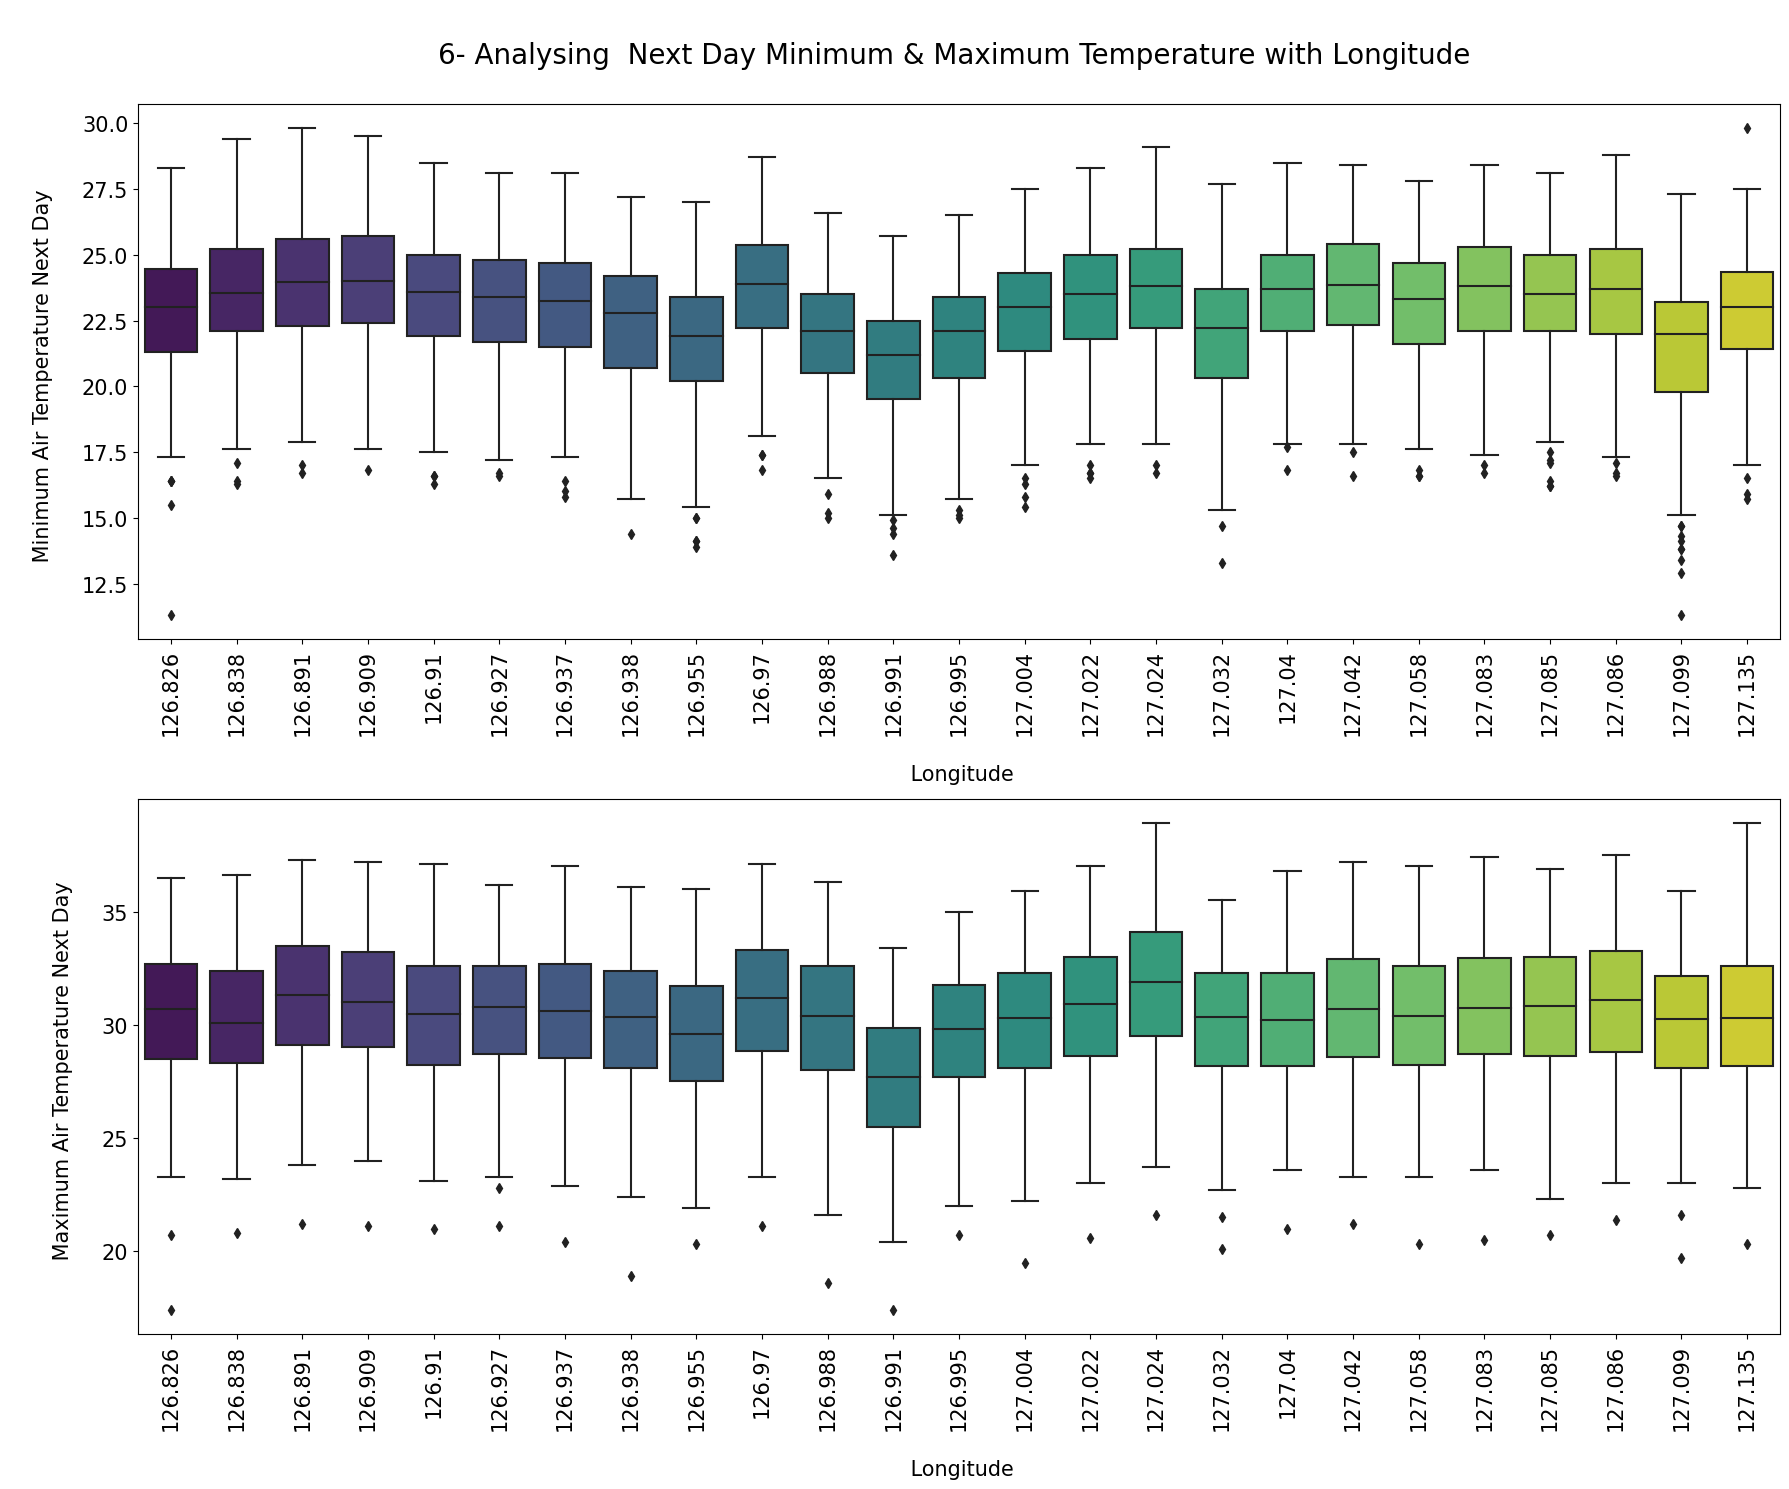

In [138]:

plt.figure(figsize = (18,15), facecolor='white')

plt.subplot(2,1,1)

plt.title('\n6- Analysing  Next Day Minimum & Maximum Temperature with Longitude \n', fontsize=20)
sns.boxplot(x='lon',y='next_tmin', data=df,palette='viridis')
plt.xlabel('\n Longitude', fontsize = 15)
plt.xticks(rotation=90,ha ='center',fontsize=15)
plt.ylabel('\n Minimum Air Temperature Next Day  \n', fontsize = 15)
plt.yticks(rotation=0, ha = 'right',fontsize=15)

plt.subplot(2,1,2)
# plt.title('\n5- Analysing  Next Day Maximum Temperature with Lattitude \n', fontsize=20)
sns.boxplot(x='lon',y='next_tmax', data=df,palette='viridis')
plt.xlabel('\n Longitude', fontsize = 15)
plt.xticks(rotation=90,ha ='center',fontsize=15)
plt.ylabel('\n Maximum Air Temperature Next Day  \n', fontsize = 15)
plt.yticks(rotation=0, ha = 'right',fontsize=15)

plt.tight_layout()
plt.show()

# ======NEXTDAY MINIMUM AIR TEMP. WITH LONGITUDES ========
# THE MINIMUM TEMPERATURE WITH LONGITUDE IS LYING IN BETWEEEN 15 - 17.5 C
# IT IS THE LOWEST PEAK OF MINIMUMA AIR TEMPERATURE IS AT 126.82 & 127.0
# THERE MAY BE PRESENCE OF OUTLIERS AT 126.82

# ======= MAXIMUM AIR TEMPERATURE WITH LONGITUDE =======
# THE MAXIMUM AIR TEMPERATURE IS HIGHEST AT THE LONGITUDDE IS - 127.04 & 127.13
# THE MAXIMUM AIR TEMPERATURE AT ALL LOGITUDE IS ABOVE =35
# AND THE AVERAGE MAXIMUM AIR TEMPERATURE AT ALL LONGITUDES IS IN BETWEEN = 28 - 32 C

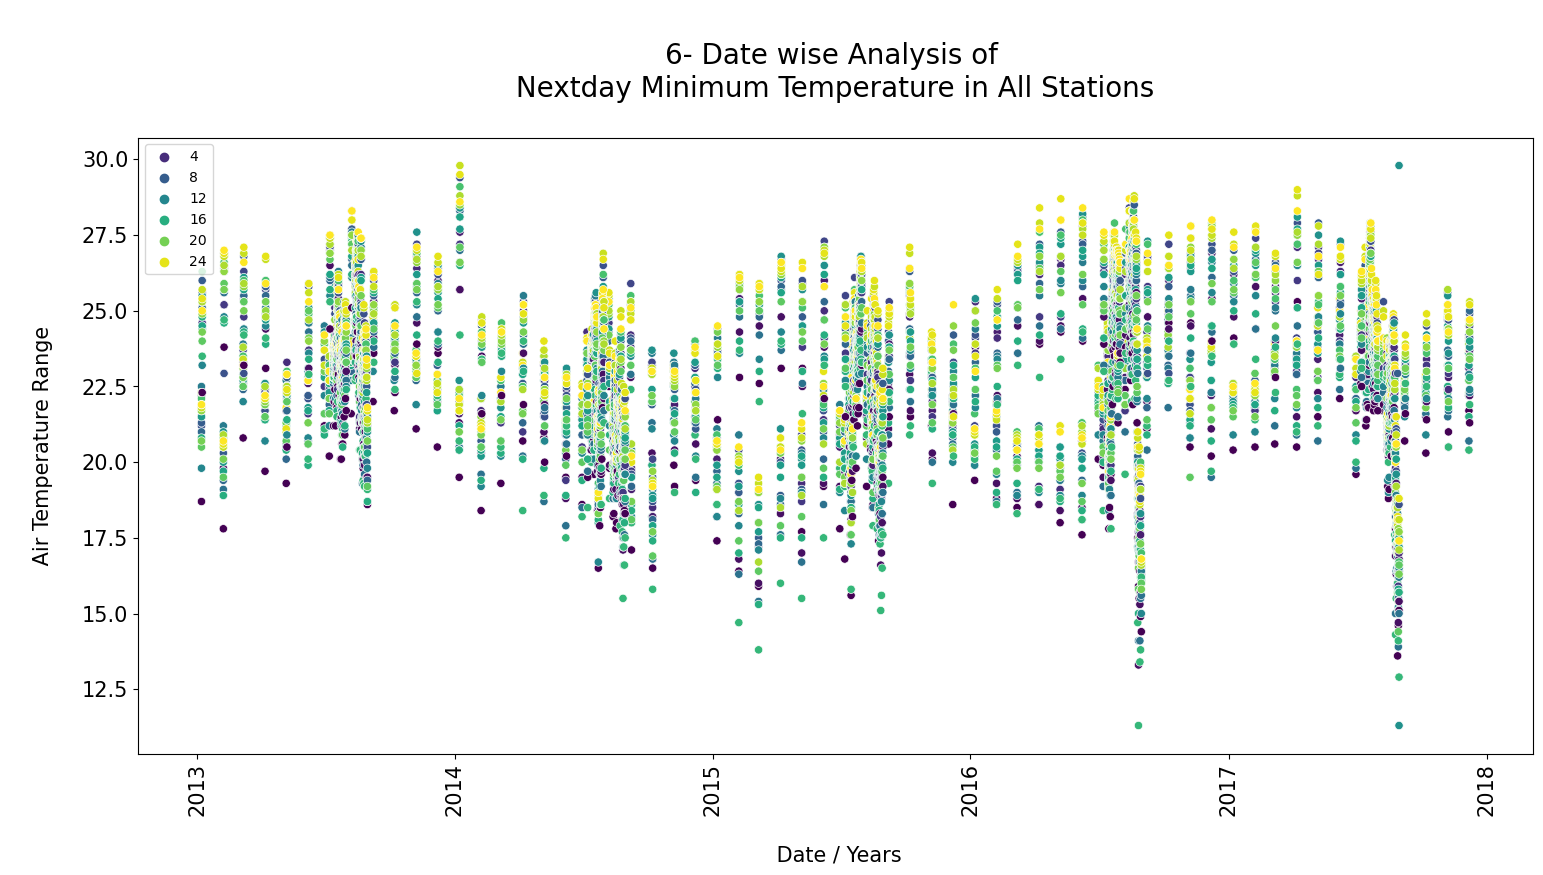

In [139]:

plt.figure(figsize = (18,8), facecolor='white')
plt.title('\n6- Date wise Analysis of \n Nextday Minimum Temperature in All Stations \n', fontsize=20)
sns.scatterplot(x='date',y='next_tmin',hue= 'station', data=df,palette='viridis')
plt.xlabel('\n Date / Years', fontsize = 15)
plt.xticks(rotation=90,ha ='center',fontsize=15)
plt.ylabel('\n Air Temperature Range \n', fontsize = 15)
plt.yticks(rotation=0, ha = 'right',fontsize=15)
plt.legend(loc='upper left')
plt.show()

# HERE BELOW WE CAN SEE IT CLEARLY THE MINIMUM TEMPERATURE IS INCREASING YEAR BY YEAR
# IT IS OBSERVED VERY LESS IN BETWEEN 2015-2016 (IN MOST OF THE MONTHS), THEN IT INCREASED, BUT ... 
# ...IN WINTER SEASON THE MINIMUM TEMPERATURE IS GOES VERY DOWN IN BETWEEN 2016-2017 & 2017-2018

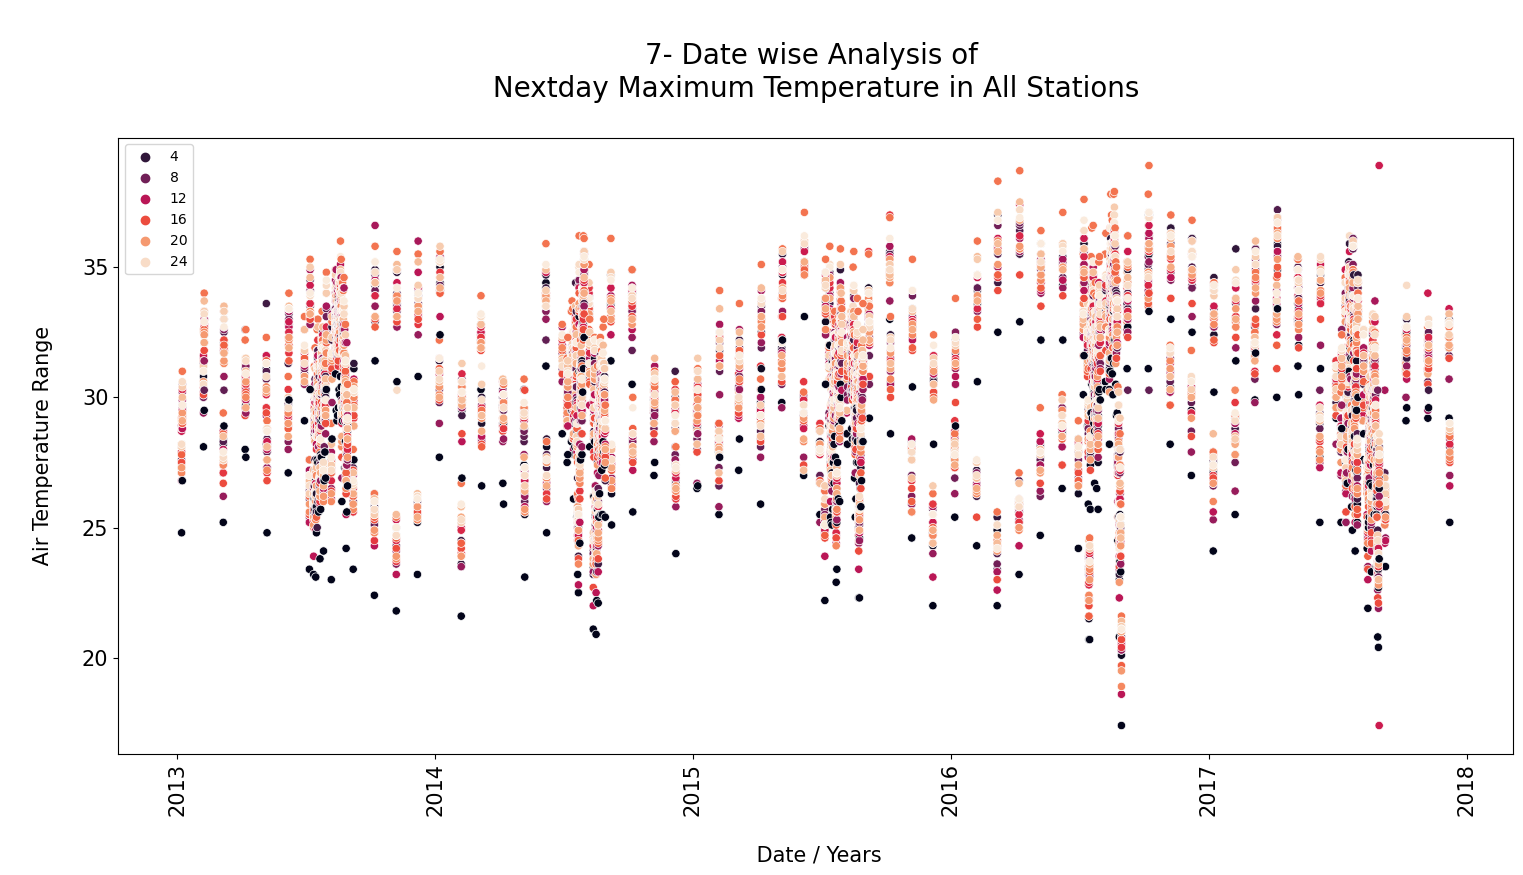

In [140]:

plt.figure(figsize = (18,8), facecolor='white')
plt.title('\n7- Date wise Analysis of \n Nextday Maximum Temperature in All Stations \n', fontsize=20)
sns.scatterplot(x='date',y='next_tmax',hue= 'station', data=df,palette='rocket')
plt.xlabel('\n Date / Years', fontsize = 15)
plt.xticks(rotation=90,ha ='center',fontsize=15)
plt.ylabel('\n Air Temperature Range \n', fontsize = 15)
plt.yticks(rotation=0, ha = 'right',fontsize=15)
plt.legend(loc='upper left')
plt.show()

# HERE BELOW WE CAN SEE THE 'TEMPERATURE CHANGE IN THE YEAR 2017 & 2018' AS COMPARED TO EALRIER YEARS.
# IN 2017-2018 WE CAN ONBSERVE THE PEAK OF TEMPERATURE IN BOTH SIDES .... IN MINIMUM & ALO IN MAXIMUM .....
# IN THESE TWO YEARS THE AIR TEMPERATURE IS TOUCHED THE HIGHSEST POINT & ALSO ON THE LOWEST POINT..

===================== EDA PART IS COMPLETED ============================

In [141]:
df.head(3)

,station,date,present_tmax,present_tmin,ldaps_rh_min,ldaps_rh_max,ldaps_tmax_lapse,ldaps_tmin_lapse,ldaps_ws,ldaps_lh,ldaps_cc1,ldaps_cc2,ldaps_cc3,ldaps_cc4,ldaps_ppt1,ldaps_ppt2,ldaps_ppt3,ldaps_ppt4,lat,lon,dem,slope,solar_radiation,next_tmax,next_tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9


In [142]:
df.columns.nunique()

25

============ FINDING CORRELATION IN DATASET ========================

In [143]:
cor = df.corr()
cor

# here finding non graphically correlation, here we can see that it is difficult to understand this kind of correlation....
# ....so further we find the correlation graphically by HEAT MAP.

,station,present_tmax,present_tmin,ldaps_rh_min,ldaps_rh_max,ldaps_tmax_lapse,ldaps_tmin_lapse,ldaps_ws,ldaps_lh,ldaps_cc1,ldaps_cc2,ldaps_cc3,ldaps_cc4,ldaps_ppt1,ldaps_ppt2,ldaps_ppt3,ldaps_ppt4,lat,lon,dem,slope,solar_radiation,next_tmax,next_tmin
station,1.000000,0.112655,0.131646,-0.066733,-0.166984,0.069107,0.104758,0.005277,-0.133357,0.006919,0.003396,0.000694,0.006126,-0.002709,-0.008250,-0.012461,-0.010401,-0.237502,-0.118704,-0.255830,-0.090061,-0.019001,0.107983,0.128293
present_tmax,0.112655,1.000000,0.618760,-0.204571,-0.301787,0.570129,0.623496,-0.121820,0.135463,-0.311805,-0.213791,-0.144018,-0.140729,-0.109006,-0.099449,-0.120367,-0.099607,-0.052615,0.009020,-0.187121,-0.105809,-0.025439,0.610348,0.622741
present_tmin,0.131646,0.618760,1.000000,0.123143,-0.015140,0.464151,0.762993,-0.034675,-0.009258,0.084447,0.090263,-0.002772,-0.044335,0.112845,0.068176,-0.046126,-0.062965,-0.078475,-0.043461,-0.250275,-0.146339,0.053578,0.471806,0.796670
ldaps_rh_min,-0.066733,-0.204571,0.123143,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,0.745443,0.689679,0.514075,0.262665,0.390967,0.240642,0.168595,0.087099,-0.076237,0.102115,0.123744,0.244080,-0.437898,0.095019
ldaps_rh_max,-0.166984,-0.301787,-0.015140,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,0.391330,0.226957,0.130619,0.268449,0.229050,0.134607,0.117853,0.195798,0.025667,0.177168,0.219599,0.149261,-0.283738,-0.071997
ldaps_tmax_lapse,0.069107,0.570129,0.464151,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,-0.523619,-0.541327,-0.429539,-0.111065,-0.242122,-0.188115,-0.160273,-0.042093,0.090666,-0.178895,-0.162332,0.047971,0.827189,0.586868
ldaps_tmin_lapse,0.104758,0.623496,0.762993,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,0.047727,-0.044018,-0.080335,0.038056,0.000870,-0.088575,-0.094655,-0.096257,-0.026701,-0.195455,-0.185849,0.159975,0.586983,0.880176
ldaps_ws,0.005277,-0.121820,-0.034675,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,0.261090,0.242991,0.220533,0.152587,0.191886,0.161684,0.144085,0.036657,-0.059466,0.191053,0.171629,0.121759,-0.342729,-0.096576
ldaps_lh,-0.133357,0.135463,-0.009258,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,-0.264280,-0.245583,-0.172766,-0.012542,-0.077545,0.016102,0.019979,0.133221,0.025822,0.055133,0.086781,-0.047384,0.157616,-0.055440
ldaps_cc1,0.006919,-0.311805,0.084447,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,0.779683,0.517493,0.361046,0.446328,0.389453,0.168742,0.091722,-0.008131,-0.006843,-0.014090,-0.020752,0.218309,-0.452541,-0.011028


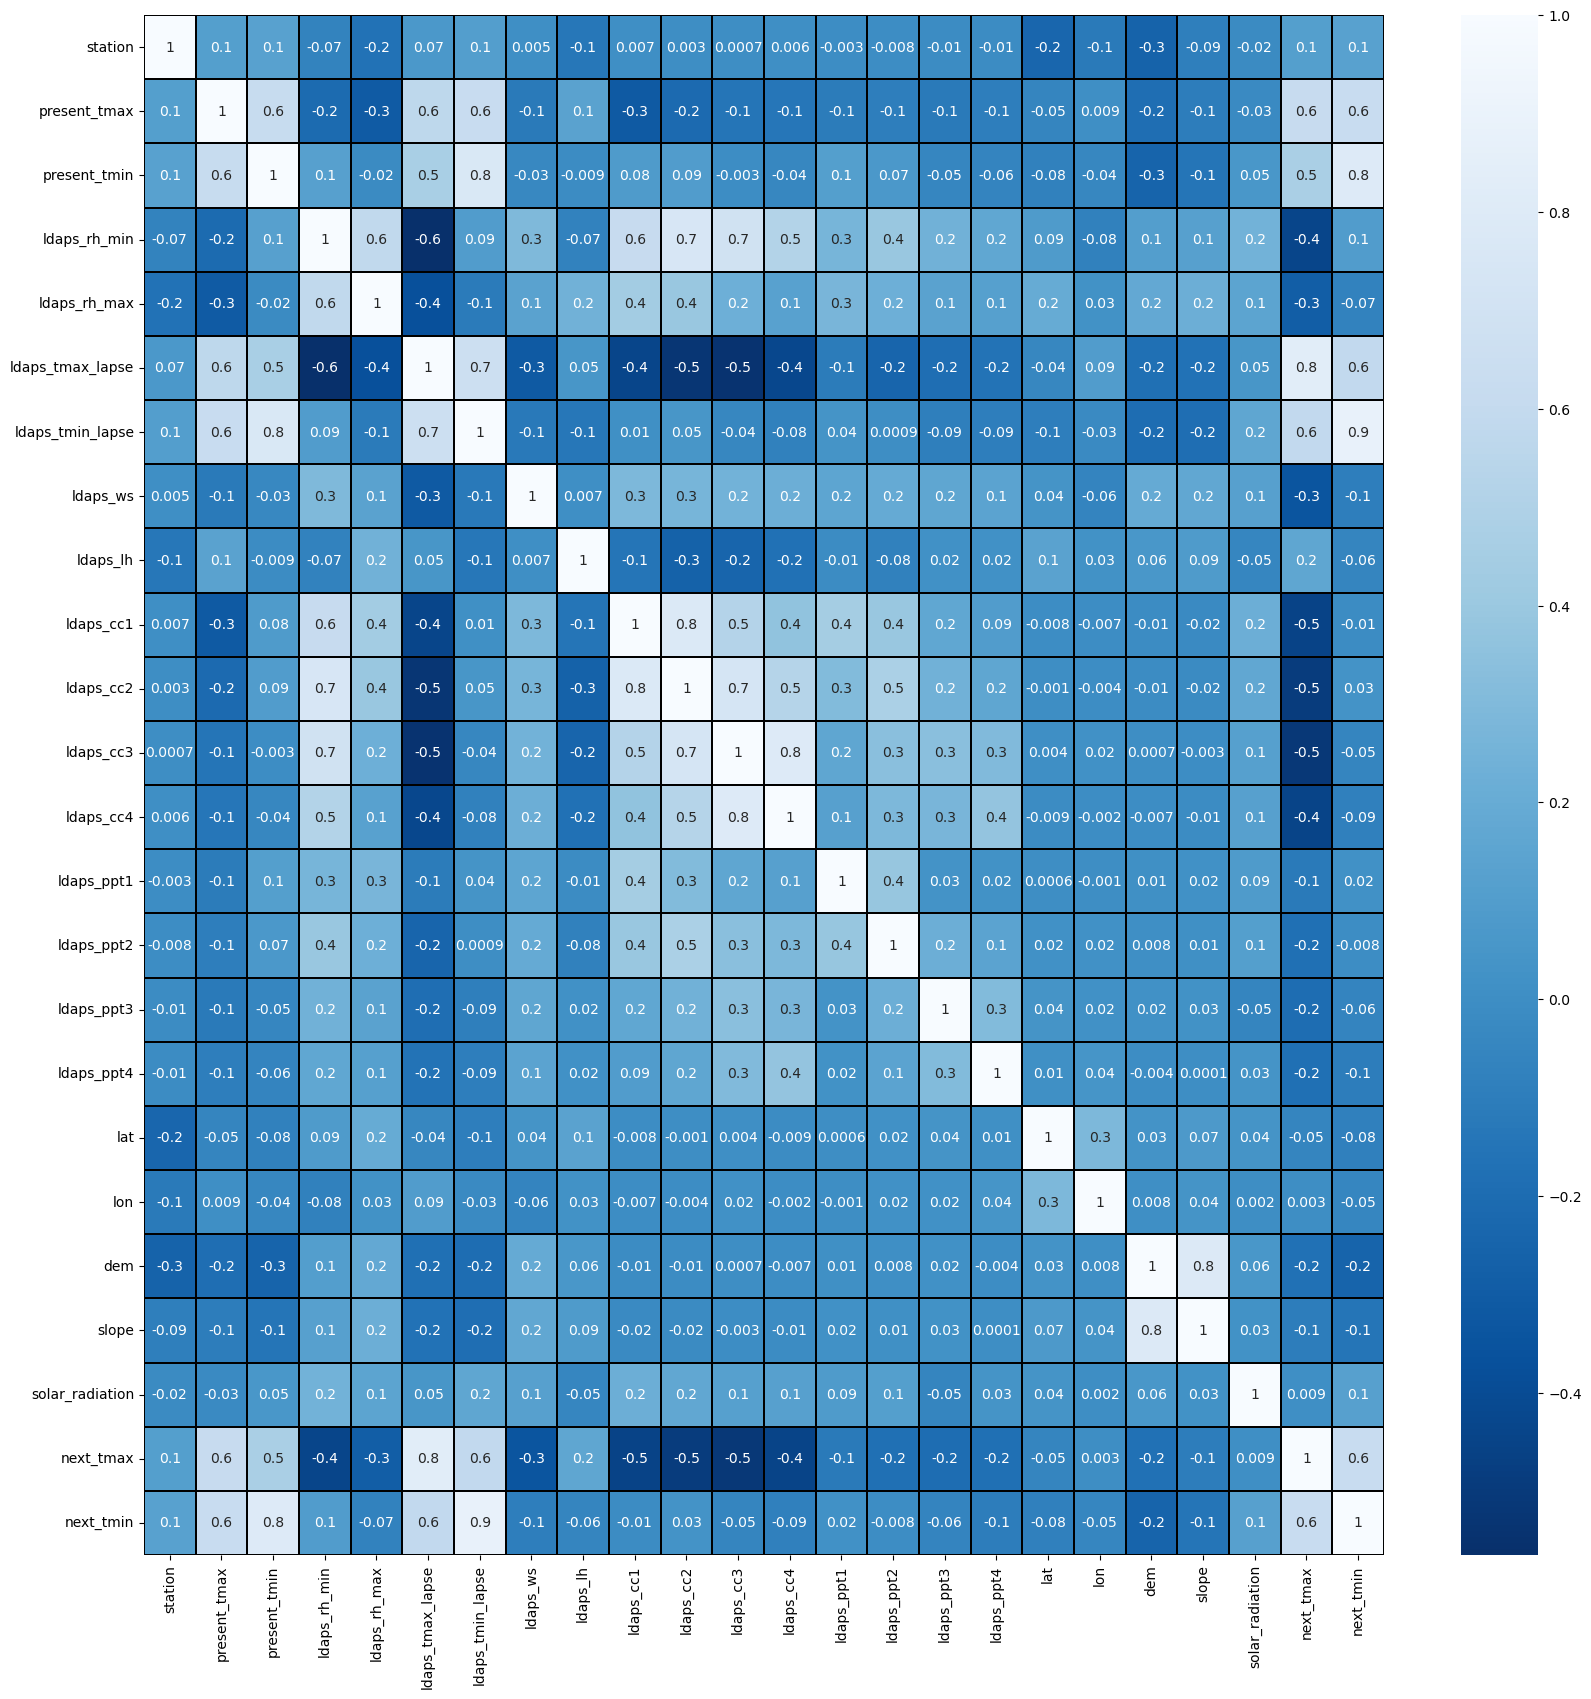

In [144]:
plt.figure (figsize = (20,20), facecolor = "white")
sns.heatmap(df.corr(),linewidth=0.1,fmt="0.1g",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()


# here we can see below that :
# 1) HIGHLY CORRELATED COLUMNS ARE :- [ present_tmax & present_tmin ], [ldaps_rh_min & max] [ldaps_tmax & min lapse]
#                                     [ldasp_cc1,cc2,cc3 &cc4] [dem & slope] [next_tmax & min]

In [145]:
# Analysing CORRELATION WITH "NEXT_TMIIN"

cor['next_tmin'].sort_values(ascending=False)

# here in the below table we can see that the HIGHLY CORRELATED COLUMN IS- 
# ldaps_tmin_lapse, present_tmin, present_tmax, next_tmax

next_tmin           1.000000
ldaps_tmin_lapse    0.880176
present_tmin        0.796670
present_tmax        0.622741
next_tmax           0.621427
ldaps_tmax_lapse    0.586868
station             0.128293
solar_radiation     0.120212
ldaps_rh_min        0.095019
ldaps_cc2           0.031250
ldaps_ppt1          0.021323
ldaps_ppt2         -0.008058
ldaps_cc1          -0.011028
lon                -0.046603
ldaps_cc3          -0.054726
ldaps_lh           -0.055440
ldaps_ppt3         -0.062622
ldaps_rh_max       -0.071997
lat                -0.083533
ldaps_cc4          -0.085093
ldaps_ws           -0.096576
ldaps_ppt4         -0.103682
slope              -0.146882
dem                -0.246906
Name: next_tmin, dtype: float64

In [146]:
# Analysing CORRELATION WITH "NEXT_TMAX"

cor['next_tmax'].sort_values(ascending=False)

# here in the below table we can see that the HIGHLY CORRELATED COLUMN IS- 
# ldaps_tmax_lapse, present_tmax, next_tmIx

next_tmax           1.000000
ldaps_tmax_lapse    0.827189
next_tmin           0.621427
present_tmax        0.610348
ldaps_tmin_lapse    0.586983
present_tmin        0.471806
ldaps_lh            0.157616
station             0.107983
solar_radiation     0.008795
lon                 0.003052
lat                -0.053510
slope              -0.102725
ldaps_ppt1         -0.118817
dem                -0.172538
ldaps_ppt2         -0.178383
ldaps_ppt4         -0.178718
ldaps_ppt3         -0.194143
ldaps_rh_max       -0.283738
ldaps_ws           -0.342729
ldaps_rh_min       -0.437898
ldaps_cc4          -0.446319
ldaps_cc1          -0.452541
ldaps_cc2          -0.490756
ldaps_cc3          -0.514680
Name: next_tmax, dtype: float64

CHECKING FOR OUTLIERS ======================================================================================================

In [147]:
df.columns

Index(['station', 'date', 'present_tmax', 'present_tmin', 'ldaps_rh_min',
       'ldaps_rh_max', 'ldaps_tmax_lapse', 'ldaps_tmin_lapse', 'ldaps_ws',
       'ldaps_lh', 'ldaps_cc1', 'ldaps_cc2', 'ldaps_cc3', 'ldaps_cc4',
       'ldaps_ppt1', 'ldaps_ppt2', 'ldaps_ppt3', 'ldaps_ppt4', 'lat', 'lon',
       'dem', 'slope', 'solar_radiation', 'next_tmax', 'next_tmin'],
      dtype='object')

In [148]:
df.describe()
# here in the describe methode we are getting soo many STATISTICAL INFORMATION about the dataset for each column.
# 1. first of all above we are getting 'count' for each of the column.
#                 as we know the total number of row counts for each column is 1,470. and here we are getting count for each..
#                 ... column is smame. not a single blank/'nan' is present in any of the column.

# 2. MEAN : In this, we can get MEAN VALUE for the every column.
# 3. STD : which is Standard Deviation , which shows that how the data of the column is deviate from its MEAN.
# 4. MIN : It shows the Minimum value present in the column.
# 5. 25% : It gives us the 25th Percentile Value in the column.
# 6. 50% : It gives us the 50th Percentile Value in the column.
# 7. 75% : It gives us the 75th Percentile Value in the column.
# 8. Max : It gives us the MAXIMUM VALUE present the column.

# As If in any column the Difference between the value at 75th Percentile & MAX is Higher then, there may be presence of outlier
# so we have to check the 75th% & MAX for each of the column.


#  here we find that in the following columns there is huge difference betweeen 75% & MAX :
#  1)- LDAPS_WS, 2)- LDAPS_LH, 3)-LDAPS_PPT1, 4) LDAPS_PPT2, 5) LDAPS_PP3, 6) LDAPS_PP4 7) DEM, 
# so in the above mentioned columns there may be presence of outliers, but we have to check all of the columns.

,station,present_tmax,present_tmin,ldaps_rh_min,ldaps_rh_max,ldaps_tmax_lapse,ldaps_tmin_lapse,ldaps_ws,ldaps_lh,ldaps_cc1,ldaps_cc2,ldaps_cc3,ldaps_cc4,ldaps_ppt1,ldaps_ppt2,ldaps_ppt3,ldaps_ppt4,lat,lon,dem,slope,solar_radiation,next_tmax,next_tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.210637,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,0.261185,0.256810,0.249148,0.253114,1.936331,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,0.142328,0.103100,0.082741,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,0.315667,0.265264,0.232354,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,0.554963,0.494007,0.497230,0.067593,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [149]:
df.columns

Index(['station', 'date', 'present_tmax', 'present_tmin', 'ldaps_rh_min',
       'ldaps_rh_max', 'ldaps_tmax_lapse', 'ldaps_tmin_lapse', 'ldaps_ws',
       'ldaps_lh', 'ldaps_cc1', 'ldaps_cc2', 'ldaps_cc3', 'ldaps_cc4',
       'ldaps_ppt1', 'ldaps_ppt2', 'ldaps_ppt3', 'ldaps_ppt4', 'lat', 'lon',
       'dem', 'slope', 'solar_radiation', 'next_tmax', 'next_tmin'],
      dtype='object')

In [150]:
df.columns.nunique()

25

In [151]:
columns_for_outliercheck = ['station', 'present_tmax', 'present_tmin', 'ldaps_rh_min',
       'ldaps_rh_max', 'ldaps_tmax_lapse', 'ldaps_tmin_lapse', 'ldaps_ws',
       'ldaps_lh', 'ldaps_cc1', 'ldaps_cc2', 'ldaps_cc3', 'ldaps_cc4',
       'ldaps_ppt1', 'ldaps_ppt2', 'ldaps_ppt3', 'ldaps_ppt4', 'lat', 'lon',
       'dem', 'slope', 'solar_radiation', 'next_tmax', 'next_tmin']

# here we exceeded 'date' column, becuase it is in datetime formate.

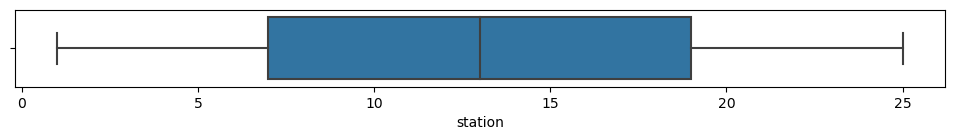

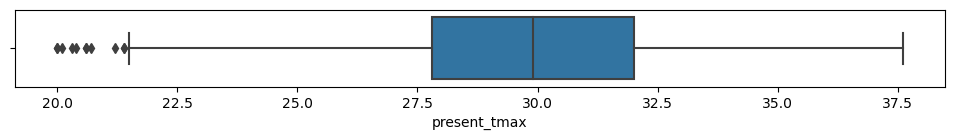

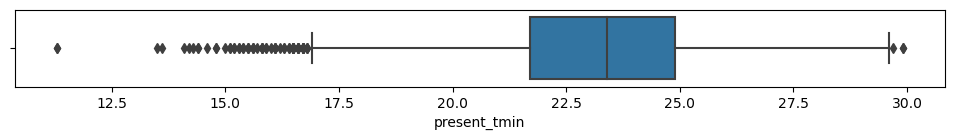

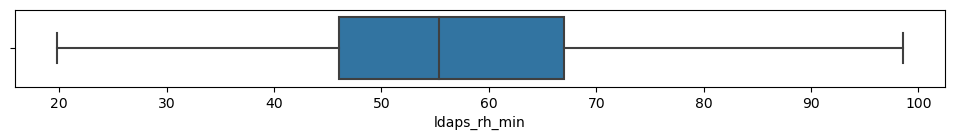

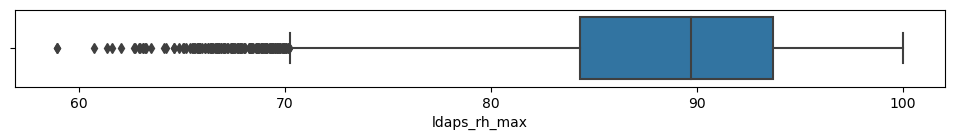

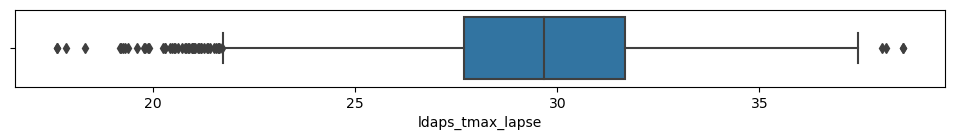

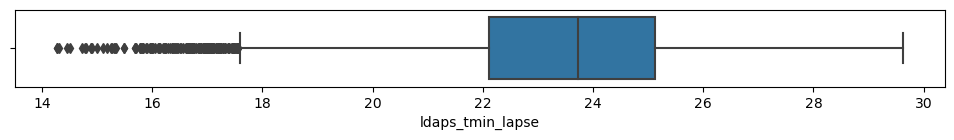

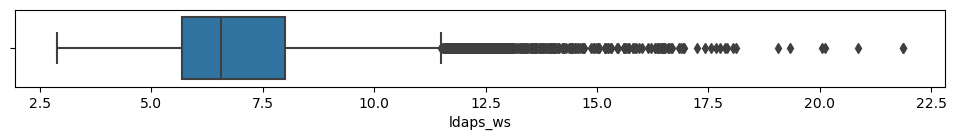

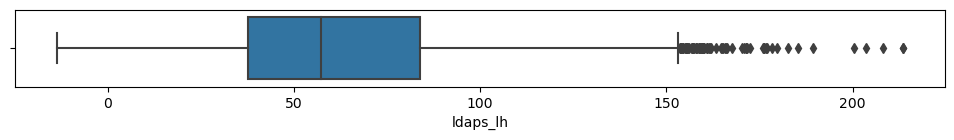

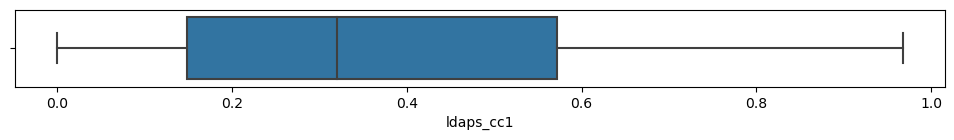

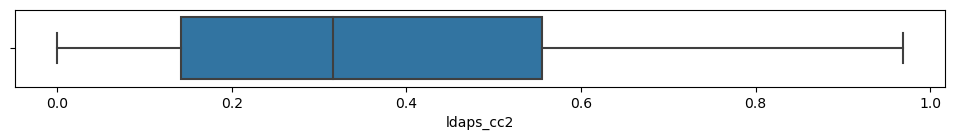

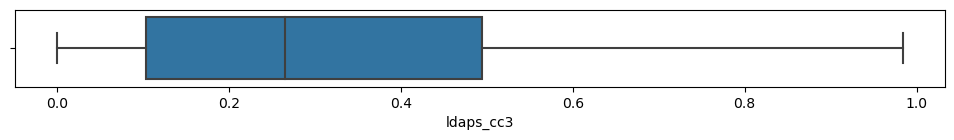

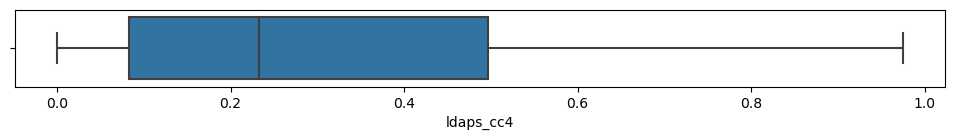

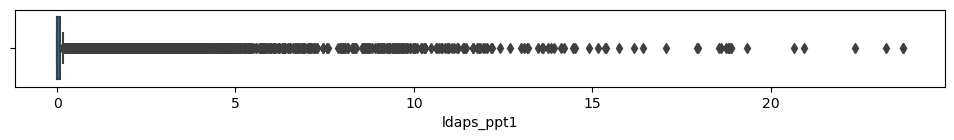

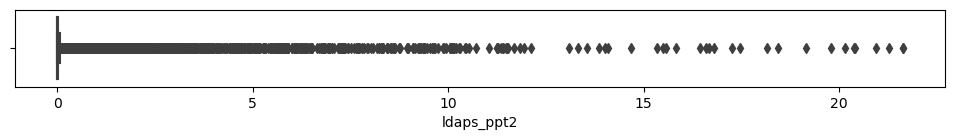

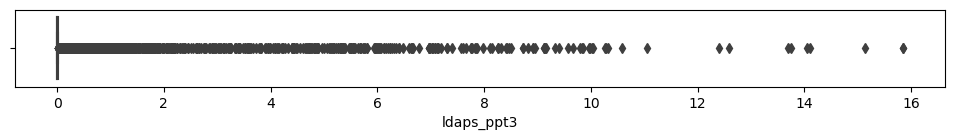

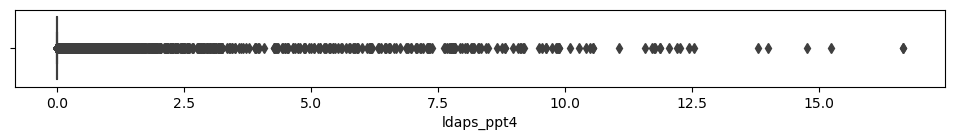

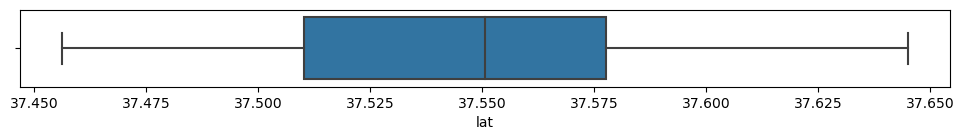

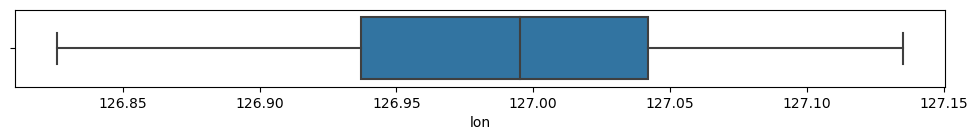

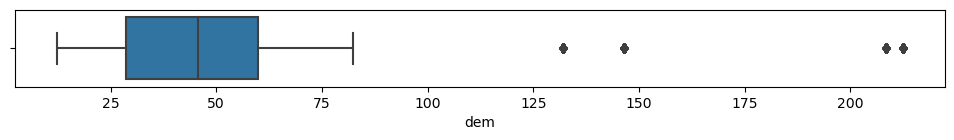

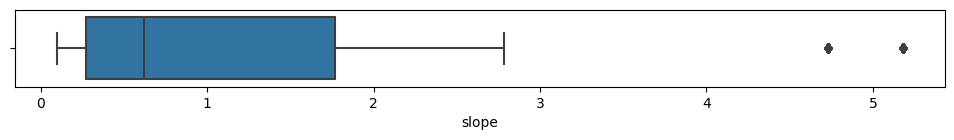

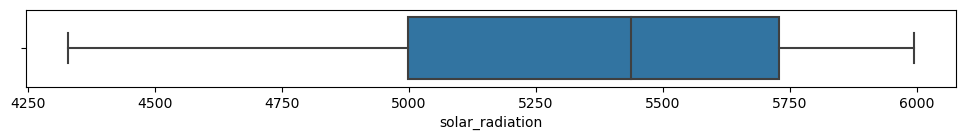

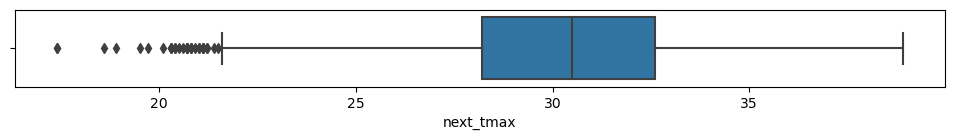

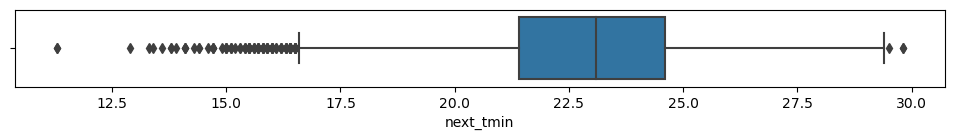

In [152]:
for i in columns_for_outliercheck[0:24]:
    plt.figure (figsize = (12,1), facecolor = "white")
    sns.boxplot(x=i,data=df)
    plt.show()
    
#  here below we can find the outliers for all the cloumns by using boxplot.
#  and we are found outliers in :
#  (1)present_tmax, (2) present_tmin ,(3) ldaps_rm_max ,(4)ldaps_tmax_lapse ,(5) ldaps_tmin_lapse, (6)ldaps_ws, (7)ldaps_lh
# .....(8)ldaps_pp1, (9) ldaps_ppt2 (10) ldaps_ppt3 (11) ldaps_ppt4, (12)dem, (13) slope, (14) next_tmax, (15)next_tmin
# ...are having outliers.
# so out of 25 columns we found OUTLIERS IN 15 COLUMNS , now we have to remove those outliers from out dataset.

========== REMOVING OF OUTLIERS BY USING Z-SCORE METHOD  ====================

In [153]:
#  we can not remove outliers from out TARGET COLUMN, so first we have to seprate target column first.
# For this first we need to identify the ZSCORE VALUES, for which we have to import some libraries.

In [154]:
df1 = df[['station', 'present_tmax', 'present_tmin', 'ldaps_rh_min',
       'ldaps_rh_max', 'ldaps_tmax_lapse', 'ldaps_tmin_lapse', 'ldaps_ws',
       'ldaps_lh', 'ldaps_cc1', 'ldaps_cc2', 'ldaps_cc3', 'ldaps_cc4',
       'ldaps_ppt1', 'ldaps_ppt2', 'ldaps_ppt3', 'ldaps_ppt4', 'lat', 'lon',
       'dem', 'slope', 'solar_radiation', 'next_tmax', 'next_tmin']]

# here we exceeded 'date' column, becuase it is in datetime formate. so we can't remove outliers in that formate column.

In [155]:
from scipy.stats import zscore

In [156]:
z = np.abs(zscore(df1))
z.head(5)

# by applying 'abs' (absolute method), we are getting all the entries whose z-score value is positive side
#  Ideally we can call the OUTLIERS whos ZSCORE VALUE is LESS THEN 3 AND MORE THEN 3
# so we have to remove all the data whose ZSCORE >3 & <3
#  below here we apllying "abs" i.e absolute method it returns us the all zscore values greater then 3
#  so we just need to remove lesserr then 3 zscore values.

,station,present_tmax,present_tmin,ldaps_rh_min,ldaps_rh_max,ldaps_tmax_lapse,ldaps_tmin_lapse,ldaps_ws,ldaps_lh,ldaps_cc1,ldaps_cc2,ldaps_cc3,ldaps_cc4,ldaps_ppt1,ldaps_ppt2,ldaps_ppt3,ldaps_ppt4,lat,lon,dem,slope,solar_radiation,next_tmax,next_tmin
0,1.664315,0.361326,0.759529,0.102515,0.383078,0.524889,0.216663,0.128382,0.206966,0.516243,0.592636,0.629013,0.664815,0.30575,0.276489,0.240636,0.224453,1.189286,0.005000,2.772243,1.115004,1.517935,0.376282,0.697599
1,1.525622,0.721084,0.676296,0.308027,0.311586,0.080895,0.223848,0.646994,0.314841,0.548557,0.406199,0.638055,0.677462,0.30575,0.276489,0.240636,0.224453,1.189286,0.511177,0.315157,0.542158,1.229950,0.072097,0.174064
2,1.386929,0.619608,0.031188,0.552814,0.614982,0.162936,0.451210,0.441604,1.249283,0.610450,0.384009,0.458843,0.620575,0.30575,0.276489,0.240636,0.224453,0.653021,0.838510,0.526218,0.723133,1.216534,0.264260,0.389744
3,1.248236,0.754909,0.072805,0.101426,1.133054,0.031092,0.079874,0.666247,0.095997,0.583539,0.506548,0.631178,0.651696,0.30575,0.276489,0.240636,0.224453,1.991696,0.385280,0.297588,0.932424,1.201176,0.456422,0.550832
4,1.109544,0.551957,0.551446,0.040098,0.248765,0.170325,0.011187,0.627154,1.354409,0.832287,0.413115,0.559990,0.510358,0.30575,0.276489,0.240636,0.224453,0.118743,1.807917,0.494322,0.548433,1.207205,0.296287,0.174064


In [157]:
threshold = 3
print(np.where(z>3))

# here below we found only 38 values,  whose z-score is more then > 3 
# i.e means we are having 38 values which might be outliers,are still present in our dataset,....
# ...and we have to remove those outliers

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64), array([ 7, 14, 14, ..., 14, 15, 16], dtype=int64))


In [158]:
df_new = df1[(z<3).all(axis=1)]
df_new

# here we can see the difference clearly that, earlier there was 614 total rows are there, and now after removing outliers..
# ...there are only 577 rows are present in our dataset.
# so there are  37 OUTLIERS are removed during this process.

,station,present_tmax,present_tmin,ldaps_rh_min,ldaps_rh_max,ldaps_tmax_lapse,ldaps_tmin_lapse,ldaps_ws,ldaps_lh,ldaps_cc1,ldaps_cc2,ldaps_cc3,ldaps_cc4,ldaps_ppt1,ldaps_ppt2,ldaps_ppt3,ldaps_ppt4,lat,lon,dem,slope,solar_radiation,next_tmax,next_tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [159]:
df1.shape

(7752, 24)

In [160]:
df_new.shape

(6894, 24)

In [161]:
7752-6894

858

In [162]:
# total = 858 outliers are removed

===============CHECKING REMOVAL OF OUTLIERS BY BOXPLOT (COMPARING  'df1'  &  'df_new') ========================

In [163]:
#  (1)present_tmax, (2) present_tmin ,(3) ldaps_rh_max ,(4)ldaps_tmax_lapse ,(5) ldaps_tmin_lapse, (6)ldaps_ws, (7)ldaps_lh
# .....(8)ldaps_pp1, (9) ldaps_ppt2 (10) ldaps_ppt3 (11) ldaps_ppt4, (12)dem, (13) slope, (14) next_tmax, (15)next_tmin

In [164]:
df_new.columns

Index(['station', 'present_tmax', 'present_tmin', 'ldaps_rh_min',
       'ldaps_rh_max', 'ldaps_tmax_lapse', 'ldaps_tmin_lapse', 'ldaps_ws',
       'ldaps_lh', 'ldaps_cc1', 'ldaps_cc2', 'ldaps_cc3', 'ldaps_cc4',
       'ldaps_ppt1', 'ldaps_ppt2', 'ldaps_ppt3', 'ldaps_ppt4', 'lat', 'lon',
       'dem', 'slope', 'solar_radiation', 'next_tmax', 'next_tmin'],
      dtype='object')

In [165]:
# Analysing BEFORE & AFTER REMOVAL OF OUTLIERS (column by column) =====>>>>

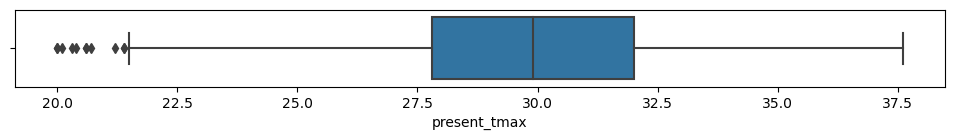

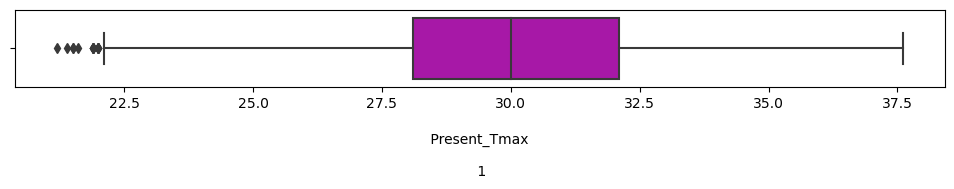

In [166]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='present_tmax',data=df1)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='present_tmax',data=df_new, color='m')
plt.xlabel('\n Present_Tmax \n\n 1')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

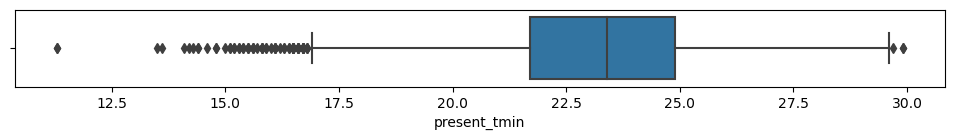

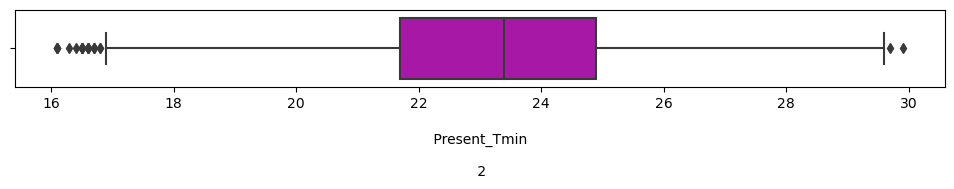

In [167]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='present_tmin',data=df1)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='present_tmin',data=df_new, color='m')
plt.xlabel('\n Present_Tmin \n\n 2')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

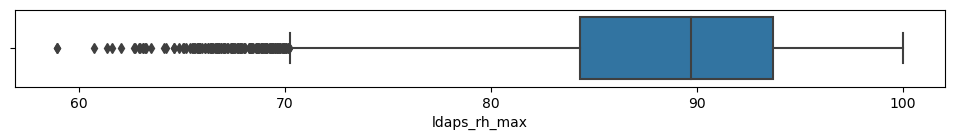

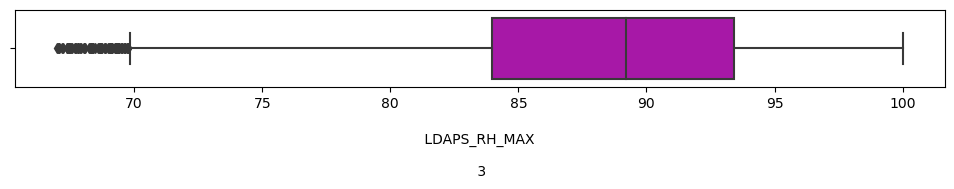

In [168]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='ldaps_rh_max',data=df1)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='ldaps_rh_max',data=df_new, color='m')
plt.xlabel('\n LDAPS_RH_MAX \n\n 3')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

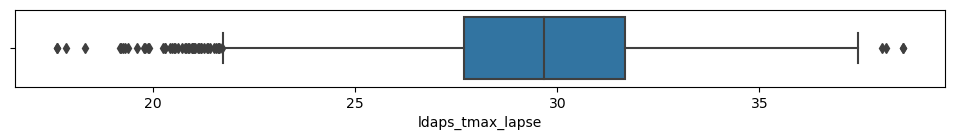

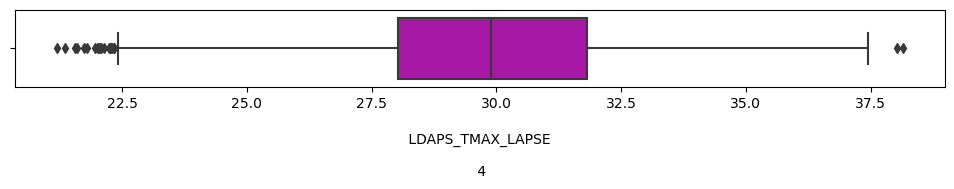

In [169]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='ldaps_tmax_lapse',data=df1)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='ldaps_tmax_lapse',data=df_new, color='m')
plt.xlabel('\n LDAPS_TMAX_LAPSE \n\n 4')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

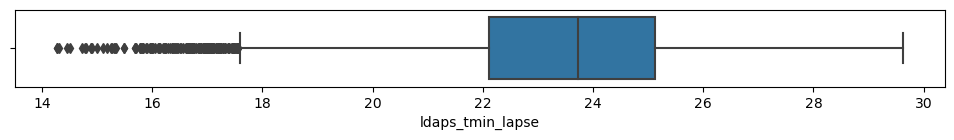

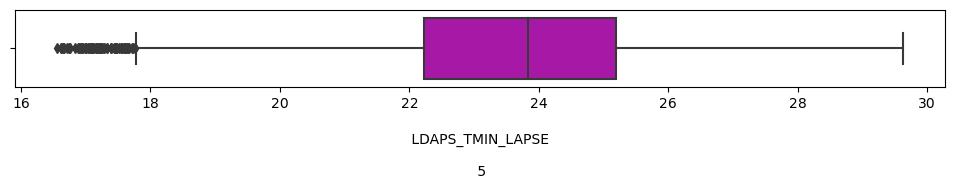

In [170]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='ldaps_tmin_lapse',data=df1)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='ldaps_tmin_lapse',data=df_new, color='m')
plt.xlabel('\n LDAPS_TMIN_LAPSE \n\n 5')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

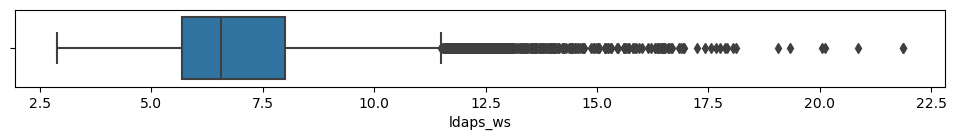

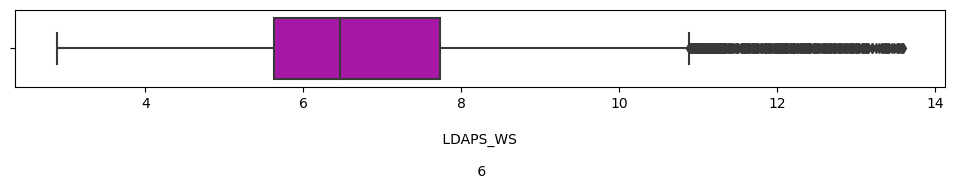

In [171]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='ldaps_ws',data=df1)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='ldaps_ws',data=df_new, color='m')
plt.xlabel('\n LDAPS_WS \n\n 6')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

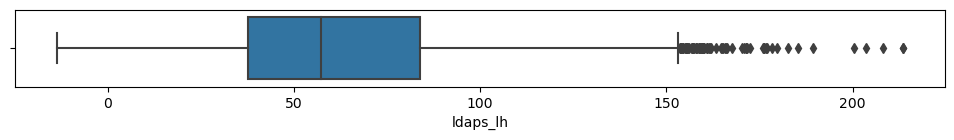

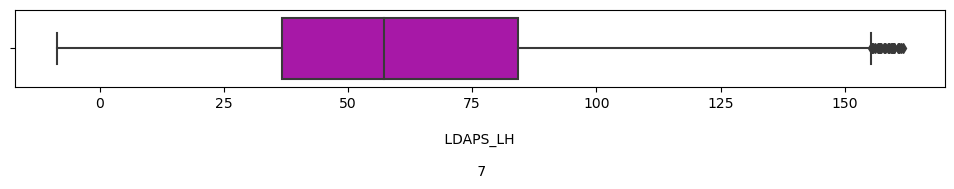

In [172]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='ldaps_lh',data=df1)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='ldaps_lh',data=df_new, color='m')
plt.xlabel('\n LDAPS_LH \n\n 7')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

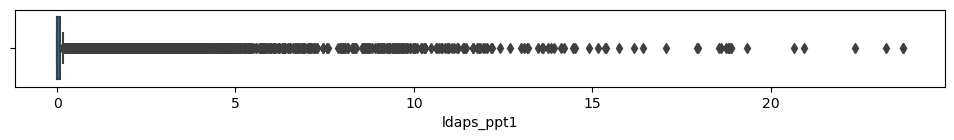

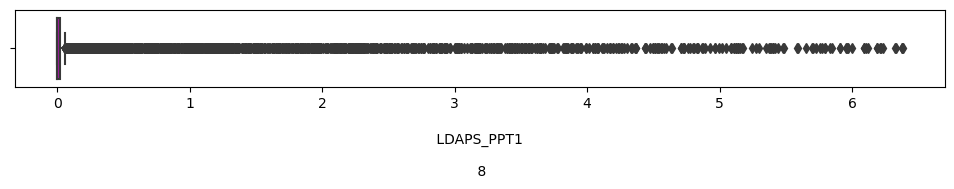

In [173]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='ldaps_ppt1',data=df1)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='ldaps_ppt1',data=df_new, color='m')
plt.xlabel('\n LDAPS_PPT1 \n\n 8')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

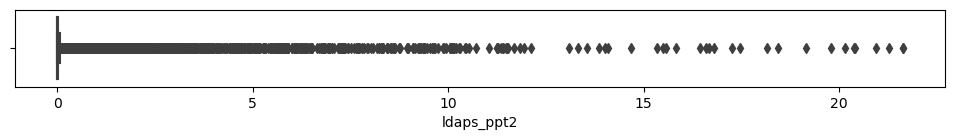

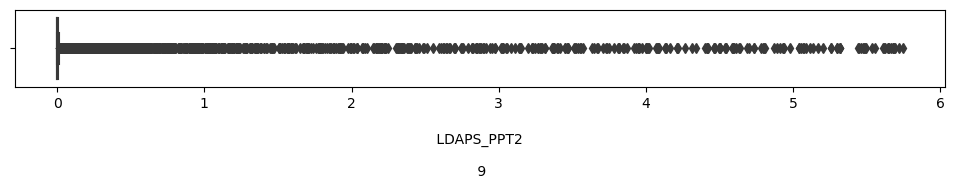

In [174]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='ldaps_ppt2',data=df1)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='ldaps_ppt2',data=df_new, color='m')
plt.xlabel('\n LDAPS_PPT2 \n\n 9')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

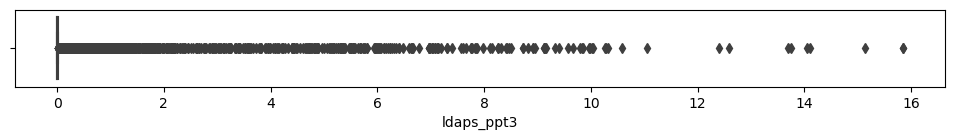

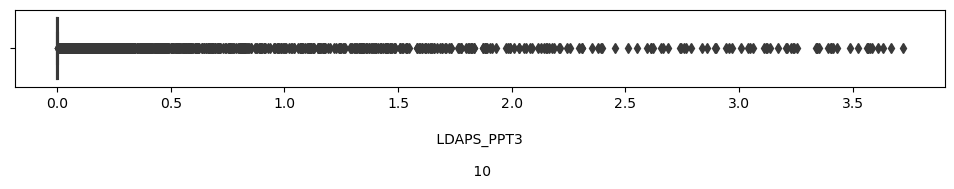

In [175]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='ldaps_ppt3',data=df1)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='ldaps_ppt3',data=df_new, color='m')
plt.xlabel('\n LDAPS_PPT3 \n\n 10')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

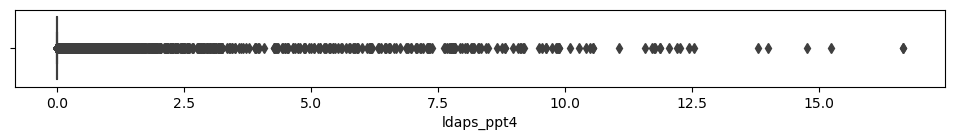

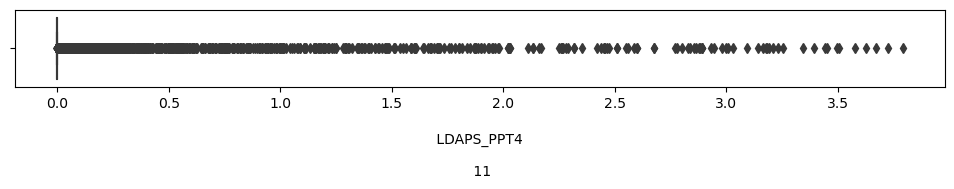

In [176]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='ldaps_ppt4',data=df1)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='ldaps_ppt4',data=df_new, color='m')
plt.xlabel('\n LDAPS_PPT4 \n\n 11')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

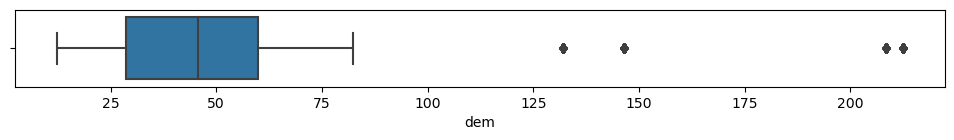

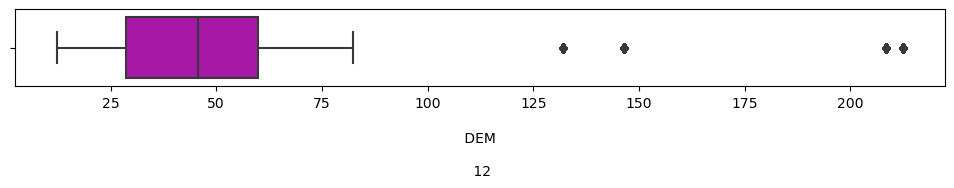

In [177]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='dem',data=df1)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='dem',data=df_new, color='m')
plt.xlabel('\n DEM \n\n 12')
plt.show()

# NO outliers WERE removed.

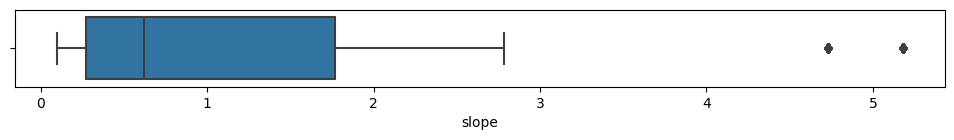

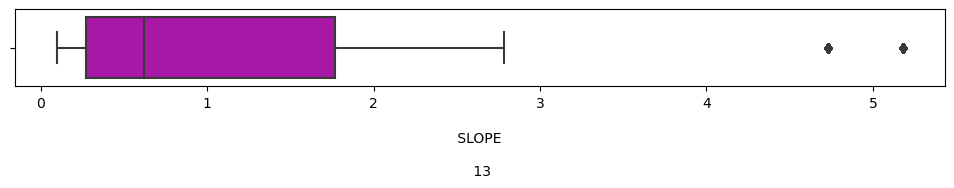

In [178]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='slope',data=df1)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='slope',data=df_new, color='m')
plt.xlabel('\n SLOPE \n\n 13')
plt.show()

# NO outliers WERE removed.

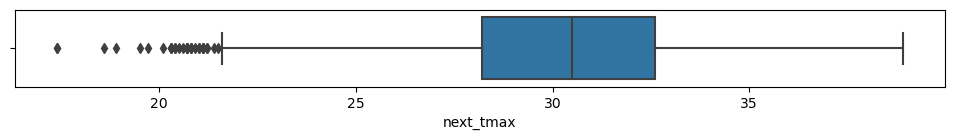

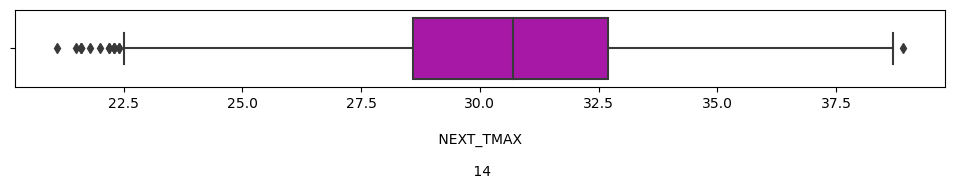

In [179]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='next_tmax',data=df1)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='next_tmax',data=df_new, color='m')
plt.xlabel('\n NEXT_TMAX \n\n 14')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

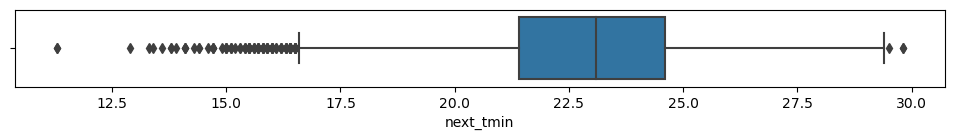

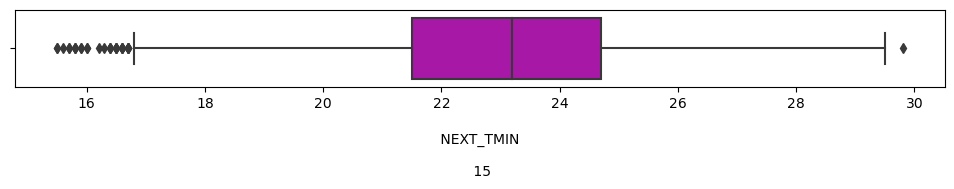

In [180]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='next_tmin',data=df1)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='next_tmin',data=df_new, color='m')
plt.xlabel('\n NEXT_TMIN \n\n 15')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

============== CHECKING & REMOVING OF OUTLIERS ARE COMPLETED HERE ===============================================

CHECKING SKEWNESS  ======================================================

In [181]:
# the skewness shows the distribution of data, if the data is widely skewed that means it is not good for our model.
#  ideal range of skewness is ( -0.5 to +0.5)
# We can't remove skewness from our Target Column

In [182]:
df_new.skew()
# here in the below table we can see the skewness in the following columns:
# LDAPS_WS, LDAPS_PP1-2-3 & 4, DEM & SLOPE
#  so we have to remove the skewness from the mentioned columns for better results.

station             0.002792
present_tmax       -0.272653
present_tmin       -0.225479
ldaps_rh_min        0.305740
ldaps_rh_max       -0.688257
ldaps_tmax_lapse   -0.109372
ldaps_tmin_lapse   -0.382667
ldaps_ws            1.087781
ldaps_lh            0.568781
ldaps_cc1           0.593990
ldaps_cc2           0.500911
ldaps_cc3           0.700217
ldaps_cc4           0.710930
ldaps_ppt1          3.731226
ldaps_ppt2          4.843672
ldaps_ppt3          5.482625
ldaps_ppt4          5.927822
lat                 0.108251
lon                -0.275508
dem                 1.764031
slope               1.593600
solar_radiation    -0.505353
next_tmax          -0.270084
next_tmin          -0.237767
dtype: float64

In [183]:
# so here we are removing the skewness by using 'cuberoot method'

In [184]:
df_new['ldaps_ws'] = np.cbrt(df_new['ldaps_ws'])
df_new['ldaps_ppt1'] = np.cbrt(df_new['ldaps_ppt1'])
df_new['ldaps_ppt2'] = np.cbrt(df_new['ldaps_ppt2'])
df_new['ldaps_ppt3'] = np.cbrt(df_new['ldaps_ppt3'])
df_new['ldaps_ppt4'] = np.cbrt(df_new['ldaps_ppt4'])
df_new['dem'] = np.cbrt(df_new['dem'])
df_new['slope'] = np.cbrt(df_new['slope'])

In [185]:
df_new.skew()

# skewness removed successfully

station             0.002792
present_tmax       -0.272653
present_tmin       -0.225479
ldaps_rh_min        0.305740
ldaps_rh_max       -0.688257
ldaps_tmax_lapse   -0.109372
ldaps_tmin_lapse   -0.382667
ldaps_ws            0.616390
ldaps_lh            0.568781
ldaps_cc1           0.593990
ldaps_cc2           0.500911
ldaps_cc3           0.700217
ldaps_cc4           0.710930
ldaps_ppt1          1.854774
ldaps_ppt2          2.242623
ldaps_ppt3          2.392493
ldaps_ppt4          2.714029
lat                 0.108251
lon                -0.275508
dem                 0.934952
slope               0.621552
solar_radiation    -0.505353
next_tmax          -0.270084
next_tmin          -0.237767
dtype: float64

================ REMOVED SKEWNESS, HOWEVER IT IS POSSIBLE ==================

DIVIDING DATA INTO INDEPENDENT & TARGET VARIABLE ===================================================================================================================

In [186]:
# HERE WE ARE HAVING TWO GIVEN CONDITION:

# 1- CONDITION 1- WHERE TARGET COLUMN IS = NEXT DAY MINIMUM AIR TEMPERATURE (next_tmin)
# 2- CONDITION 2- WHER TARGET COLUMN IS = NEXT DAY MAXIMUM AIR TEMPERATURE (next_tmax)

# SO WE CAN APPLY BOTH CONDITIONS SYMALTENIOUSLY :-

In [187]:
df_new.columns

Index(['station', 'present_tmax', 'present_tmin', 'ldaps_rh_min',
       'ldaps_rh_max', 'ldaps_tmax_lapse', 'ldaps_tmin_lapse', 'ldaps_ws',
       'ldaps_lh', 'ldaps_cc1', 'ldaps_cc2', 'ldaps_cc3', 'ldaps_cc4',
       'ldaps_ppt1', 'ldaps_ppt2', 'ldaps_ppt3', 'ldaps_ppt4', 'lat', 'lon',
       'dem', 'slope', 'solar_radiation', 'next_tmax', 'next_tmin'],
      dtype='object')

for condition 1 ====>>>> where 'next_tmin' is TARGET COLUMN

In [188]:
x1 = df_new[['station', 'present_tmax', 'present_tmin', 'ldaps_rh_min',
       'ldaps_rh_max', 'ldaps_tmax_lapse', 'ldaps_tmin_lapse', 'ldaps_ws',
       'ldaps_lh', 'ldaps_cc1', 'ldaps_cc2', 'ldaps_cc3', 'ldaps_cc4',
       'ldaps_ppt1', 'ldaps_ppt2', 'ldaps_ppt3', 'ldaps_ppt4', 'lat', 'lon',
       'dem', 'slope', 'solar_radiation', 'next_tmax']]

# here we are skipping next_tmin in in x1

In [189]:
y1= df_new[['next_tmin']]

In [190]:
print(x1.shape)
print(y1.shape)

(6894, 23)
(6894, 1)


for condition 2 ====>>>> where 'next_tmAax' is TARGET COLUMN

In [191]:
x2 = df_new[['station', 'present_tmax', 'present_tmin', 'ldaps_rh_min',
       'ldaps_rh_max', 'ldaps_tmax_lapse', 'ldaps_tmin_lapse', 'ldaps_ws',
       'ldaps_lh', 'ldaps_cc1', 'ldaps_cc2', 'ldaps_cc3', 'ldaps_cc4',
       'ldaps_ppt1', 'ldaps_ppt2', 'ldaps_ppt3', 'ldaps_ppt4', 'lat', 'lon',
       'dem', 'slope', 'solar_radiation', 'next_tmin']]

y2 = df_new [['next_tmax']]

In [192]:
print(x2.shape)
print(y2.shape)

(6894, 23)
(6894, 1)


 APPLYING SCALING TECHNIQUES FOR BOTH OF CONDITIONS ==================================================================================================================>>>>>>

In [193]:
# here we need to apply scaling techniques on our dataset,by scaling techniques we normalise the values.
#  we can't apply SCALING TECHNIQUES on TARGET VARIABLE
#  to aplly scaling techinuque we need to import some libraries first.

In [194]:
from sklearn.preprocessing import StandardScaler

In [195]:
st = StandardScaler()

In [196]:
x1 = st.fit_transform(x1)
x1

array([[-1.6719535 , -0.43361467, -0.8284707 , ...,  1.29410305,
         1.55206749, -0.49908524],
       [-1.5330388 ,  0.68756737, -0.74176307, ..., -0.41452764,
         1.25787504, -0.02170707],
       [-1.3941241 ,  0.58245655, -0.00474815, ..., -0.85981211,
         1.2441708 ,  0.18288357],
       ...,
       [ 1.38416996, -2.32560937, -2.6926849 , ..., -1.15755353,
        -2.13673686, -0.77187277],
       [ 1.52308466, -2.32560937, -2.43256199, ..., -0.96536186,
        -2.14849763, -0.66957745],
       [ 1.66199936, -2.36064631, -2.56262344, ..., -0.84807222,
        -2.11761834, -0.94236497]])

In [197]:
x2 = st.fit_transform(x2)
x2

array([[-1.6719535 , -0.43361467, -0.8284707 , ...,  1.29410305,
         1.55206749, -0.80081377],
       [-1.5330388 ,  0.68756737, -0.74176307, ..., -0.41452764,
         1.25787504, -0.24837178],
       [-1.3941241 ,  0.58245655, -0.00474815, ..., -0.85981211,
         1.2441708 ,  0.34656575],
       ...,
       [ 1.38416996, -2.32560937, -2.6926849 , ..., -1.15755353,
        -2.13673686, -2.11817544],
       [ 1.52308466, -2.32560937, -2.43256199, ..., -0.96536186,
        -2.14849763, -1.82070667],
       [ 1.66199936, -2.36064631, -2.56262344, ..., -0.84807222,
        -2.11761834, -2.4156442 ]])

In [198]:
xf1 = pd.DataFrame(data=x1)
xf2 = pd.DataFrame(data=x2)
print(xf1)
print(xf2)

# here we get our dataset (xf1 & xf2) after applying SCALING TECHING (STANDARD SCALER)


            0         1         2         3         4         5         6   \
0    -1.671954 -0.433615 -0.828471  0.191277  0.436386 -0.661684 -0.290765   
1    -1.533039  0.687567 -0.741763 -0.242211  0.362340 -0.012103  0.173349   
2    -1.394124  0.582457 -0.004748 -0.500679 -0.597331  0.075869  0.412895   
3    -1.255209  0.722604  0.038606  0.190127  1.213156 -0.065508 -0.146647   
4    -1.116295  0.512383 -0.611702  0.040693  0.297274 -0.281486 -0.074279   
...        ...       ...       ...       ...       ...       ...       ...   
6889  1.106341 -2.395683 -2.389208 -2.236969 -1.424012 -0.757262 -2.414309   
6890  1.245255 -2.605905 -2.562623 -1.845904 -0.638370 -1.162309 -2.635053   
6891  1.384170 -2.325609 -2.692685 -2.088503 -1.335953 -1.291313 -2.200929   
6892  1.523085 -2.325609 -2.432562 -2.283872 -1.563873 -1.050685 -2.219962   
6893  1.661999 -2.360646 -2.562623 -2.363999 -1.571287 -0.710893 -2.315014   

            7         8         9         10        11        1

In [199]:
xf1.columns

RangeIndex(start=0, stop=23, step=1)

In [200]:
xf2.columns

RangeIndex(start=0, stop=23, step=1)

In [201]:
column_con1 = ['station', 'present_tmax', 'present_tmin', 'ldaps_rh_min',
       'ldaps_rh_max', 'ldaps_tmax_lapse', 'ldaps_tmin_lapse', 'ldaps_ws',
       'ldaps_lh', 'ldaps_cc1', 'ldaps_cc2', 'ldaps_cc3', 'ldaps_cc4',
       'ldaps_ppt1', 'ldaps_ppt2', 'ldaps_ppt3', 'ldaps_ppt4', 'lat', 'lon',
       'dem', 'slope', 'solar_radiation', 'next_tmax']

In [202]:
column_con2 = ['station', 'present_tmax', 'present_tmin', 'ldaps_rh_min',
       'ldaps_rh_max', 'ldaps_tmax_lapse', 'ldaps_tmin_lapse', 'ldaps_ws',
       'ldaps_lh', 'ldaps_cc1', 'ldaps_cc2', 'ldaps_cc3', 'ldaps_cc4',
       'ldaps_ppt1', 'ldaps_ppt2', 'ldaps_ppt3', 'ldaps_ppt4', 'lat', 'lon',
       'dem', 'slope', 'solar_radiation', 'next_tmin']

In [203]:
xf1.columns = column_con1

In [204]:
yf1 = y1

In [205]:
xf2.columns = column_con2

In [206]:
yf2=y2

In [207]:
xf1.columns

Index(['station', 'present_tmax', 'present_tmin', 'ldaps_rh_min',
       'ldaps_rh_max', 'ldaps_tmax_lapse', 'ldaps_tmin_lapse', 'ldaps_ws',
       'ldaps_lh', 'ldaps_cc1', 'ldaps_cc2', 'ldaps_cc3', 'ldaps_cc4',
       'ldaps_ppt1', 'ldaps_ppt2', 'ldaps_ppt3', 'ldaps_ppt4', 'lat', 'lon',
       'dem', 'slope', 'solar_radiation', 'next_tmax'],
      dtype='object')

In [208]:
yf1.head(2)

,next_tmin
0,21.2
1,22.5


In [209]:
xf2.columns

Index(['station', 'present_tmax', 'present_tmin', 'ldaps_rh_min',
       'ldaps_rh_max', 'ldaps_tmax_lapse', 'ldaps_tmin_lapse', 'ldaps_ws',
       'ldaps_lh', 'ldaps_cc1', 'ldaps_cc2', 'ldaps_cc3', 'ldaps_cc4',
       'ldaps_ppt1', 'ldaps_ppt2', 'ldaps_ppt3', 'ldaps_ppt4', 'lat', 'lon',
       'dem', 'slope', 'solar_radiation', 'next_tmin'],
      dtype='object')

In [210]:
yf2.head(2)

,next_tmax
0,29.1
1,30.5


In [211]:
print(xf1.shape)
print(yf1.shape)

print(xf2.shape)
print(yf2.shape)

(6894, 23)
(6894, 1)
(6894, 23)
(6894, 1)


FINDING MULTICOLINEARITY ======================================================================================================================

In [212]:
# We have to find the multicollinearity between the features and to remove it we can use VIF (VARIANCE INFLATION FACTOR)
# we can not apply VIF on the TARGET COLUMN
# for apllyin VIF we have to import some libraries as follows

In [213]:
import statsmodels.api as sm
from scipy import stats
from statsmodels .stats.outliers_influence import variance_inflation_factor

FOR CONDITION-1 ======= WHERE  TARGET = Tmin

In [214]:
# here we are making "def function" for calculating VIF for CONDITION-1
def calc_vif(xf1):
    vif = pd.DataFrame()
    vif["FETURES"] = xf1.columns
    vif["VIF FACTOR"] = [variance_inflation_factor(xf1.values,i) for i in range (xf1.shape[1])]
    return (vif)

In [215]:
calc_vif(xf1)
# here we can't find any HIGHER Multicolinearity in our dataset

,FETURES,VIF FACTOR
0,station,1.254193
1,present_tmax,2.827975
2,present_tmin,3.016853
3,ldaps_rh_min,5.908359
4,ldaps_rh_max,2.244870
5,ldaps_tmax_lapse,7.990342
6,ldaps_tmin_lapse,6.807331
7,ldaps_ws,1.234086
8,ldaps_lh,1.554991
9,ldaps_cc1,4.829427


FOR CONDITION-2 ======== where TARGET = Tmax

In [216]:
# here we are making "def function" for calculating VIF for CONDITION-1
def calc_vif(xf2):
    vif = pd.DataFrame()
    vif["FETURES"] = xf2.columns
    vif["VIF FACTOR"] = [variance_inflation_factor(xf2.values,i) for i in range (xf2.shape[1])]
    return (vif)

In [217]:
calc_vif(xf2)
# here we can't find any HIGHER Multicolinearity in our dataset

,FETURES,VIF FACTOR
0,station,1.244901
1,present_tmax,2.762346
2,present_tmin,3.303693
3,ldaps_rh_min,5.952049
4,ldaps_rh_max,2.241667
5,ldaps_tmax_lapse,6.862234
6,ldaps_tmin_lapse,8.342933
7,ldaps_ws,1.212507
8,ldaps_lh,1.528243
9,ldaps_cc1,4.809488


================  UPTO HERE EDA AND OTHER TECHINIQUES ARE COMPLETED ==================================

=============================== NOW WE NEED TO APPLY ML MODELS ======================================================

In [218]:
# Here in the given dataset we are provided with the 2 SITUATION, where...
#  in SITUATION-1 = We have to Predict 'MINIMUM AIR TEMPERATURE FOR NEXT DAY, which is in NEUMERICAL FORM.
#  in SITUATION-2 = We have to predict MAXIMUM AIR TEMPERATURE FOR NEXT DAY, which is also a NEUMERICAL FORM
#                   therefore for situation-1 & 2 BOTH we have to aplly REGRESSION MODEL.

# the CONCLUSION IS THAT WE ARE MAKEING 2 DIFFERENT ML-MODELS, THEREFORE WE WOULD HAVE 2 DIFFERENT (.pkl) files.

CONDITION - 1

APPLYING TRAIN TEST SPLIT ======

In [219]:
#  Applying TRAIN_TEST_SPLIT ====>>>
#  IMPORTING SOME IMPORTANT REQUIIRED LIBRARIES

In [220]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [221]:
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0) 
elasticnet = ElasticNet(alpha=1.0, l1_ratio=0.5)
lr = LinearRegression()
dtr = DecisionTreeRegressor()
knn = KNeighborsRegressor(n_neighbors=5)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
rfr = RandomForestRegressor()
svr = SVR()

In [222]:
model = [lr,dtr,rfr,svr]

MODEL-1 (CONDITION-1)

In [223]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(xf1,yf1,test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)*100
        
    
    if acc > maxaccu :
        maxaccu = acc
        maxrs = i
        
print ("Best accuracy is",maxaccu, "at random state", maxrs)
print ("with Best Fitted Model is :",lr)

Best accuracy is 85.28669097902834 at random state 74
with Best Fitted Model is : LinearRegression()


MODEL-2 (CONDITION-1)

In [224]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(xf1,yf1,test_size=0.20,random_state=i)
    dtr = DecisionTreeRegressor()
    dtr.fit(x_train,y_train)
    pred = dtr.predict(x_test)
    acc = r2_score(y_test,pred)*100
        
    
    if acc > maxaccu :
        maxaccu = acc
        maxrs = i
        
print ("Best accuracy is",maxaccu, "at random state", maxrs)
print ("with Best Fitted Model is :",dtr)

Best accuracy is 81.17270267515127 at random state 183
with Best Fitted Model is : DecisionTreeRegressor()


MODEL-3 (CONDITION-1)

In [225]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(xf1,yf1,test_size=0.20,random_state=i)
    ridge = Ridge(alpha=1.0)
    ridge.fit(x_train,y_train)
    pred = ridge.predict(x_test)
    acc = r2_score(y_test,pred)*100
        
    
    if acc > maxaccu :
        maxaccu = acc
        maxrs = i
        
print ("Best accuracy is",maxaccu, "at random state", maxrs)
print ("with Best Fitted Model is :",ridge)

# ACCURACY SCORE WITH RIDGE REGRESSION IS = 85.28 % WITH BEST RANDOM STATE = 74

Best accuracy is 85.28596477593643 at random state 74
with Best Fitted Model is : Ridge()


MODEL-4 (CONDITION-1)

In [226]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(xf1,yf1,test_size=0.20,random_state=i)
    lasso = Lasso(alpha=1.0) 
    lasso.fit(x_train,y_train)
    pred = lasso.predict(x_test)
    acc = r2_score(y_test,pred)*100
        
    
    if acc > maxaccu :
        maxaccu = acc
        maxrs = i
        
print ("Best accuracy is",maxaccu, "at random state", maxrs)
print ("with Best Fitted Model is :",lasso)

# ACCURACY SCORE WITH LASSO REGRESSION IS = 61 % WITH BEST RANDOM STATE = 91

Best accuracy is 61.04236459376116 at random state 91
with Best Fitted Model is : Lasso()


MODEL-5 (CONDITION-1)

In [227]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(xf1,yf1,test_size=0.20,random_state=i)
    elasticnet = ElasticNet(alpha=1.0, l1_ratio=0.5) 
    elasticnet.fit(x_train,y_train)
    pred = elasticnet.predict(x_test)
    acc = r2_score(y_test,pred)*100
        
    
    if acc > maxaccu :
        maxaccu = acc
        maxrs = i
        
print ("Best accuracy is",maxaccu, "at random state", maxrs)
print ("with Best Fitted Model is :",lasso)

# ACCURACY SCORE WITH ELASTIC NET REGRESSION IS = 69 % WITH BEST RANDOM STATE = 67

Best accuracy is 69.1352159188053 at random state 67
with Best Fitted Model is : Lasso()


MODEL-6 (CONDITION-1)

In [228]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(xf1,yf1,test_size=0.20,random_state=i)
    knn = KNeighborsRegressor(n_neighbors=5) 
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    acc = r2_score(y_test,pred)*100
        
    
    if acc > maxaccu :
        maxaccu = acc
        maxrs = i
        
print ("Best accuracy is",maxaccu, "at random state", maxrs)
print ("with Best Fitted Model is :",knn)

# ACCURACY SCORE WITH ELASTIC KNN REGRESSION IS = 88 % WITH BEST RANDOM STATE = 33

Best accuracy is 88.35901174525821 at random state 33
with Best Fitted Model is : KNeighborsRegressor()


MODEL-7 (CONDITION-1)

In [229]:
# maxaccu = 0
# maxrs = 0

# for i in range(1,200):
#     x_train,x_test,y_train,y_test = train_test_split(xf1,yf1,test_size=0.20,random_state=i)
#     gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3) 
#     gbr.fit(x_train,y_train)
#     pred = gbr.predict(x_test)
#     acc = r2_score(y_test,pred)*100
        
    
#     if acc > maxaccu :
#         maxaccu = acc
#         maxrs = i
        
# print ("Best accuracy is",maxaccu, "at random state", maxrs)
# print ("with Best Fitted Model is :",knn)

# IT IS TAKING TOO LARGE TIME & STILL NO RESPONDING

MODEL-8 (CONDITION-1)

In [230]:
# maxaccu = 0
# maxrs = 0

# for i in range(1,200):
#     x_train,x_test,y_train,y_test = train_test_split(xf1,yf1,test_size=0.20,random_state=i)
#     svr = SVR()
#     svr.fit(x_train,y_train)
#     pred = svr.predict(x_test)
#     acc = r2_score(y_test,pred)*100
        
    
#     if acc > maxaccu :
#         maxaccu = acc
#         maxrs = i
        
# print ("Best accuracy is",maxaccu, "at random state", maxrs)
# print ("with Best Fitted Model is :",svr)

# SVR MODEL ALSO TAKEN VERY LONG TIME AND STILL NOT RESPONDING.

MODEL-9 (CONDITION-1)

In [231]:
# maxaccu = 0
# maxrs = 0

# for i in range(1,200):
#     x_train,x_test,y_train,y_test = train_test_split(xf1,yf1,test_size=0.20,random_state=i)
#     rfr = RandomForestRegressor()
#     rfr.fit(x_train,y_train)
#     pred = rfr.predict(x_test)
#     acc = r2_score(y_test,pred)*100
        
    
#     if acc > maxaccu :
#         maxaccu = acc
#         maxrs = i
        
# print ("Best accuracy is",maxaccu, "at random state", maxrs)
#  print ("with Best Fitted Model is :",rfr)

# IT WAS TAKING TOO MUCH TIME AND STILL NOT RESPONDING 

In [232]:
#  SO OUT OF ABOVE MODELS lr = LinearRegression() MODEL IS WORKING VERYGOOD WITH 85% OF ACCURACY AT RANDOM_STATE = 74
# SO WE CAN CHEK IT INDIVIDUALLY ALSO....


KNN - AS A FINAL MODEL (CONDITION-1)

In [233]:
x_train,x_test,y_train,y_test = train_test_split(xf1,yf1,test_size=0.20,random_state=33)
knn = KNeighborsRegressor(n_neighbors=5) 
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
accuracy= r2_score(y_test,pred)*100
mse = mean_squared_error (y_test,pred)
        

print(knn.score(x_train,y_train))
print("Accuracy of the model is %.2f" %accuracy)
print("mean squared error:", np.sqrt(mean_squared_error(y_test,pred)))

# print(f'Intercept: {knn.intercept_[0]}')
# print(f'Coefficient: {knn.coef_[0][0]}')
print(f'R-squared (R2): {accuracy:.2f}')

print ("with Best Fitted Model is :",knn)

# HERE THE MODEL IS WORKING VERY-GOOD WITH THE ACCURACY RATE OF = 88 %
# & MEAN SQUARED ERROR IS ALSO VERY LESS (difference between actual & pridected points) = 0.82

0.9132687642395657
Accuracy of the model is 88.36
mean squared error: 0.8222846736032369
R-squared (R2): 88.36
with Best Fitted Model is : KNeighborsRegressor()


In [234]:
# ANALYSING ACTUAL V/S PREDICTED VALUES FOR KNN-REGRESSOR ===>>>

In [235]:
y_test.head(),pred[0:5]

(      next_tmin
 6026       22.5
 6532       26.5
 2637       22.3
 4035       27.0
 1129       24.6,
 array([[24.38],
        [25.  ],
        [22.34],
        [26.38],
        [25.16]]))

DTC - DECISION TREE IS ALSO WORKING GOOD, BUT PREDICTION % IS LESS THEN KNN, THEREFORE WE CONSIDER KNN AS FINAL MODEL

In [236]:
x_train,x_test,y_train,y_test = train_test_split(xf1,yf1,test_size=0.20,random_state=74)
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
accuracy= r2_score(y_test,pred)*100
mse = mean_squared_error (y_test,pred)
        

print(lr.score(x_train,y_train))
print("Accuracy of the model is %.2f" %accuracy)
print("mean squared error:", np.sqrt(mean_squared_error(y_test,pred)))

print(f'Intercept: {lr.intercept_[0]}')
print(f'Coefficient: {lr.coef_[0][0]}')
print(f'R-squared (R2): {accuracy:.2f}')

print ("with Best Fitted Model is :",lr)

# HERE THE MODEL IS WORKING VERYGOOD WITH THE ACCURACY RATE OF = 85 %
# & MEAN SQUARED ERROR IS ALSO VERY LESS = 0.91
# INTERCEPT IS AT = 23
# COFFICIENT OF DETERMINATION IS = -0.04

0.8292951071002901
Accuracy of the model is 85.29
mean squared error: 0.9197603846295819
Intercept: 23.087865492711746
Coefficient: -0.040571974636127564
R-squared (R2): 85.29
with Best Fitted Model is : LinearRegression()


In [237]:
#  ANALYSING ACTUAL & PREDICTED VALUES FOR DECISION TREE REGRESSOR=======>>>>

In [238]:
y_test.head(),pred[0:5]

# here below we can find 5 actual and 5 predicted values.

(      next_tmin
 4275       18.5
 469        22.7
 7667       18.3
 5546       26.3
 3626       23.4,
 array([[19.02320396],
        [22.97260529],
        [19.8860265 ],
        [26.50851536],
        [23.49255582]]))

In [239]:
xf1.shape

(6894, 23)

In [240]:
xf1.head(10)

,station,present_tmax,present_tmin,ldaps_rh_min,ldaps_rh_max,ldaps_tmax_lapse,ldaps_tmin_lapse,ldaps_ws,ldaps_lh,ldaps_cc1,ldaps_cc2,ldaps_cc3,ldaps_cc4,ldaps_ppt1,ldaps_ppt2,ldaps_ppt3,ldaps_ppt4,lat,lon,dem,slope,solar_radiation,next_tmax
0,-1.671954,-0.433615,-0.828471,0.191277,0.436386,-0.661684,-0.290765,0.060191,0.225159,-0.445412,-0.533242,-0.574999,-0.620382,-0.552854,-0.499447,-0.479547,-0.422157,1.214518,0.002256,2.365582,1.294103,1.552067,-0.499085
1,-1.533039,0.687567,-0.741763,-0.242211,0.362340,-0.012103,0.173349,-0.626919,-0.301816,-0.479100,-0.333449,-0.584787,-0.634027,-0.552854,-0.499447,-0.479547,-0.422157,1.214518,0.516874,-0.136077,-0.414528,1.257875,-0.021707
2,-1.394124,0.582457,-0.004748,-0.500679,-0.597331,0.075869,0.412895,-0.344808,-1.245514,-0.543626,-0.309670,-0.390815,-0.572652,-0.552854,-0.499447,-0.479547,-0.422157,0.674104,0.843217,-0.481176,-0.859812,1.244171,0.182884
3,-1.255209,0.722604,0.038606,0.190127,1.213156,-0.065508,-0.146647,-0.654111,0.113090,-0.515570,-0.440987,-0.577343,-0.606228,-0.552854,-0.499447,-0.479547,-0.422157,2.023139,0.391357,-0.110145,1.171532,1.228481,0.387474
4,-1.116295,0.512383,-0.611702,0.040693,0.297274,-0.281486,-0.074279,-0.599038,1.383966,-0.774897,-0.340861,-0.500293,-0.453742,-0.552854,-0.499447,-0.479547,-0.422157,0.135691,1.809694,-0.424409,-0.427196,1.234641,0.216982
5,-0.977380,0.687567,0.081959,-0.229643,-0.404320,-0.242945,0.077465,-0.317703,-0.353149,-0.639688,-0.212233,-0.265912,-0.554589,-0.552854,-0.499447,-0.479547,-0.422157,-0.674931,0.642390,0.116629,-1.189781,1.268512,0.319277
6,-0.838465,0.512383,0.472144,0.048874,-1.024815,-0.486999,0.265199,-0.695254,1.899812,0.175921,0.007909,-0.102654,-0.557392,-0.552854,-0.499447,-0.479547,-0.422157,0.674104,-1.918147,-1.418267,-1.371338,1.210076,0.114687
7,-0.699551,0.757641,0.125313,-0.237667,-1.461183,-0.377264,0.075858,-0.365688,-0.600469,0.049207,0.055308,-0.094102,-0.565340,-0.552854,-0.499447,-0.479547,-0.422157,-1.485553,-1.014428,0.065114,0.599077,1.245210,0.182884
8,-0.560636,0.512383,-0.568348,-0.019734,-1.058846,-0.532661,-0.143849,-0.419954,0.696314,0.252426,0.054774,-0.126285,-0.543727,-0.552854,-0.499447,-0.479547,-0.422157,-0.945139,-2.068767,0.025648,-0.574406,1.275940,0.251080
9,-0.421721,0.582457,-1.218655,0.075207,-0.181104,-0.843549,-0.507420,-0.114852,0.031218,0.011029,-0.106082,-0.211983,-0.601135,-0.552854,-0.499447,-0.479547,-0.422157,-1.755761,-0.449604,2.328223,2.205366,1.315712,-0.021707


In [241]:
yf1.head(10)

,next_tmin
0,21.2
1,22.5
2,23.9
3,24.3
4,22.5
5,24.0
6,23.4
7,22.9
8,21.6
9,21.0


In [242]:
def pred_func(tmin):
    tmin= tmin.reshape(1,23)
    minimum_temperature = knn.predict(tmin)
    print(minimum_temperature)
    
# making 'def' function to predict NEXTDAY MINIMUM TEMPERATURE.

In [243]:
#  TEST SAMPLE ===>>>

In [244]:
tmin= np.array([-1.671954,-0.433615,-0.828471,0.191277,0.436386,-0.661684,-0.290765,0.060191,0.225159,-0.445412,-0.533242,-0.574999,-0.620382,-0.552854,-0.499447,-0.479547,-0.422157,1.214518,0.002256,2.365582,1.294103,1.552067,-0.499085])
pred_func(tmin)

# here below we can see the result, we take sample from 'index-0'
# actual temperature = 21.2 c
# Predicted temperature = 21.8 c

# it means our model is working very good. now we have to save the model

[[21.28]]


SAVING MODEL (CONDITION-1) where target is = MINIMUM TEMPERATURE =======================================================================

In [245]:
import pickle

In [246]:
file_name = 'Predicting nextday Min. Temp.pkl' 
pickle.dump(knn,open(file_name,'wb'))

========================================================================================================================

CONDITION-2 

APPLYING MODEL FOR ( CONDITION-2 ) (where target column is = Maximum Temperature) =====================================================================================

MODEL-1 (CONDITION-2)

In [247]:
# HERE BELOW THE LINEAR REGRESSION MODEL IS GIVING 79 % OF ACCURACY WITH RANDOM STATE = 92,  FOR CONDITION-2

In [248]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(xf2,yf2,test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)*100
        
    
    if acc > maxaccu :
        maxaccu = acc
        maxrs = i
        
print ("Best accuracy is",maxaccu, "at random state", maxrs)
print ("with Best Fitted Model is :",lr)


Best accuracy is 79.78630948991245 at random state 92
with Best Fitted Model is : LinearRegression()


MODEL-2 (CONDITION-2)

In [249]:
# HERE BELOW DECISION TREE REGRESSOR IS ALSO GIVING 79.56 % ACCURACY WITH RANDOM STATE 108  FOR CONDITION-2 

In [250]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(xf2,yf2,test_size=0.20,random_state=i)
    dtr = DecisionTreeRegressor()
    dtr.fit(x_train,y_train)
    pred = dtr.predict(x_test)
    acc = r2_score(y_test,pred)*100
        
    
    if acc > maxaccu :
        maxaccu = acc
        maxrs = i
        
print ("Best accuracy is",maxaccu, "at random state", maxrs)
print ("with Best Fitted Model is :",dtr)

Best accuracy is 79.70068700299913 at random state 53
with Best Fitted Model is : DecisionTreeRegressor()


MODEL-3 (CONDITION-2)

In [251]:
x_train,x_test,y_train,y_test = train_test_split(xf2,yf2,test_size=0.20,random_state=33)
knn = KNeighborsRegressor(n_neighbors=5) 
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
accuracy= r2_score(y_test,pred)*100
mse = mean_squared_error (y_test,pred)
        

print(knn.score(x_train,y_train))
print("Accuracy of the model is %.2f" %accuracy)
print("mean squared error:", np.sqrt(mean_squared_error(y_test,pred)))

# print(f'Intercept: {knn.intercept_[0]}')
# print(f'Coefficient: {knn.coef_[0][0]}')
print(f'R-squared (R2): {accuracy:.2f}')

print ("with Best Fitted Model is :",knn)

# HERE THE MODEL IS WORKING VERY-GOOD WITH THE ACCURACY RATE OF = 84 %
# & MEAN SQUARED ERROR IS ALSO VERY LESS (difference between actual & pridected points) = 1.15

0.8991299835558524
Accuracy of the model is 84.93
mean squared error: 1.15913184095364
R-squared (R2): 84.93
with Best Fitted Model is : KNeighborsRegressor()


In [252]:
y_test.head(),pred[0:5]

# here below we can find 5 actual and 5 predicted values.

(      next_tmax
 6026       31.9
 6532       33.4
 2637       26.9
 4035       36.0
 1129       33.3,
 array([[33.  ],
        [32.76],
        [27.48],
        [35.58],
        [33.38]]))

In [253]:
xf2.head(5)

,station,present_tmax,present_tmin,ldaps_rh_min,ldaps_rh_max,ldaps_tmax_lapse,ldaps_tmin_lapse,ldaps_ws,ldaps_lh,ldaps_cc1,ldaps_cc2,ldaps_cc3,ldaps_cc4,ldaps_ppt1,ldaps_ppt2,ldaps_ppt3,ldaps_ppt4,lat,lon,dem,slope,solar_radiation,next_tmin
0,-1.671954,-0.433615,-0.828471,0.191277,0.436386,-0.661684,-0.290765,0.060191,0.225159,-0.445412,-0.533242,-0.574999,-0.620382,-0.552854,-0.499447,-0.479547,-0.422157,1.214518,0.002256,2.365582,1.294103,1.552067,-0.800814
1,-1.533039,0.687567,-0.741763,-0.242211,0.362340,-0.012103,0.173349,-0.626919,-0.301816,-0.479100,-0.333449,-0.584787,-0.634027,-0.552854,-0.499447,-0.479547,-0.422157,1.214518,0.516874,-0.136077,-0.414528,1.257875,-0.248372
2,-1.394124,0.582457,-0.004748,-0.500679,-0.597331,0.075869,0.412895,-0.344808,-1.245514,-0.543626,-0.309670,-0.390815,-0.572652,-0.552854,-0.499447,-0.479547,-0.422157,0.674104,0.843217,-0.481176,-0.859812,1.244171,0.346566
3,-1.255209,0.722604,0.038606,0.190127,1.213156,-0.065508,-0.146647,-0.654111,0.113090,-0.515570,-0.440987,-0.577343,-0.606228,-0.552854,-0.499447,-0.479547,-0.422157,2.023139,0.391357,-0.110145,1.171532,1.228481,0.516548
4,-1.116295,0.512383,-0.611702,0.040693,0.297274,-0.281486,-0.074279,-0.599038,1.383966,-0.774897,-0.340861,-0.500293,-0.453742,-0.552854,-0.499447,-0.479547,-0.422157,0.135691,1.809694,-0.424409,-0.427196,1.234641,-0.248372


In [254]:
yf2.head(5)

,next_tmax
0,29.1
1,30.5
2,31.1
3,31.7
4,31.2


In [255]:
def pred_func(tmax):
    tmax= tmax.reshape(1,23)
    maximum_temperature = knn.predict(tmax)
    print(maximum_temperature)
    
# making 'def' function to predict NEXT DAY MAXIMUM TEMPERATURE.

In [256]:
# TEST SAMPLE ====>>>>

In [257]:
tmax= np.array([-1.394124,0.582457,-0.004748,-0.500679,-0.597331,0.075869,0.412895,-0.344808,-1.245514,-0.543626,-0.309670,-0.390815,-0.572652,-0.552854,-0.499447,-0.479547,-0.422157,0.674104,0.843217,-0.481176,-0.859812,1.244171,0.346566])
pred_func(tmax)

# here below we can see the result, we take sample from 'index-2'
# actual temperature = 31.1 c
# Predicted temperature = 31.4 c

# it means our model is working very good. now we have to save the model

[[31.4]]


In [258]:
# maxaccu = 0
# maxrs = 0

# for i in range(1,200):
#     x_train,x_test,y_train,y_test = train_test_split(xf2,yf2,test_size=0.20,random_state=i)
#     svr = SVR()
#     svr.fit(x_train,y_train)
#     pred = svr.predict(x_test)
#     acc = r2_score(y_test,pred)*100
        
    
#     if acc > maxaccu :
#         maxaccu = acc
#         maxrs = i
        
# print ("Best accuracy is",maxaccu, "at random state", maxrs)
# print ("with Best Fitted Model is :",svr)

#  SVR MODEL ALSO TAKEN VERY LONG TIME AND STILL NOT RESPONDING.

SAVING MODEL (CONDITION-1) where target is = MINIMUM TEMPERATURE =======================================================================

In [259]:
file_name = 'Predicting nextday Max. Temp.pkl' 
pickle.dump(knn,open(file_name,'wb'))

====================================================== FININSHED  =====================================================